In [101]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la période de données (5 ans de données)
tickers = [
    'TSLA',    # Tesla
    'GOOGL',   # Google (Alphabet)
    'META',    # Facebook (Meta)
    'AMZN',    # Amazon
    'AAPL',    # Apple
    'MSFT',    # Microsoft
    'NVDA',    # NVIDIA (important pour l'IA et les véhicules autonomes)
    'TM',      # Toyota (concurrent automobile)
    'GM',      # General Motors (concurrent automobile)
    'LIT'      # Global X Lithium ETF (pour le marché des batteries)
]

start_date = '2020-01-01'
end_date = '2025-03-15'
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

# Afficher les premières lignes
data.head()

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GM,GOOGL,LIT,META,MSFT,NVDA,TM,TSLA
Date,,,,,,,,,,
2020-01-02,72.716080,94.900497,35.908218,68.108376,26.657005,208.795944,153.323303,5.972160,142.240005,28.684000
2020-01-03,72.009125,93.748497,34.889950,67.752075,26.291311,207.691147,151.414124,5.876571,140.750000,29.534000
2020-01-06,72.582886,95.143997,34.428848,69.557945,26.406794,211.602707,151.805481,5.901216,140.770004,30.102667
2020-01-07,72.241554,95.343002,33.766018,69.423592,26.762861,212.060547,150.421387,5.972660,141.509995,31.270666
2020-01-08,73.403641,94.598503,33.285702,69.917732,26.204700,214.210419,152.817337,5.983862,141.160004,32.809334


In [102]:
# print("Prix actuel de Tesla :", tesla.history(period="1d")['Close'].iloc[-1])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1307 entries, 2020-01-02 to 2025-03-14
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1307 non-null   float64
 1   AMZN    1307 non-null   float64
 2   GM      1307 non-null   float64
 3   GOOGL   1307 non-null   float64
 4   LIT     1307 non-null   float64
 5   META    1307 non-null   float64
 6   MSFT    1307 non-null   float64
 7   NVDA    1307 non-null   float64
 8   TM      1307 non-null   float64
 9   TSLA    1307 non-null   float64
dtypes: float64(10)
memory usage: 112.3 KB


In [103]:
data.shape

(1307, 10)

In [104]:
data.describe()

Ticker,AAPL,AMZN,GM,GOOGL,LIT,META,MSFT,NVDA,TM,TSLA
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,155.263282,149.515237,40.828025,121.052532,55.008738,313.520193,293.153319,41.844326,165.124843,218.571782
std,44.173938,34.559844,10.239612,34.273028,16.940723,140.072884,83.715164,41.334144,28.511089,86.710181
min,54.449894,81.820000,16.335398,52.455711,17.447342,88.492935,129.621140,4.891975,108.500000,24.081333
25%,128.056679,122.235001,33.037979,94.370811,41.495144,210.204315,231.138458,13.697844,140.810005,175.500000
50%,152.724258,155.167007,39.089806,121.499130,57.128407,285.703461,280.366669,22.110476,164.529999,222.686661
75%,181.458183,172.190254,48.976475,142.192192,67.854977,357.460281,366.117630,48.024969,182.204994,264.523346
max,258.735504,242.059998,63.921970,206.142593,93.348907,736.015198,464.854340,149.416245,254.770004,479.859985


In [105]:
#Données manquante
data.isna().sum()

Ticker
AAPL     0
AMZN     0
GM       0
GOOGL    0
LIT      0
META     0
MSFT     0
NVDA     0
TM       0
TSLA     0
dtype: int64

In [106]:
data.duplicated().sum()

0

<Axes: xlabel='Date'>

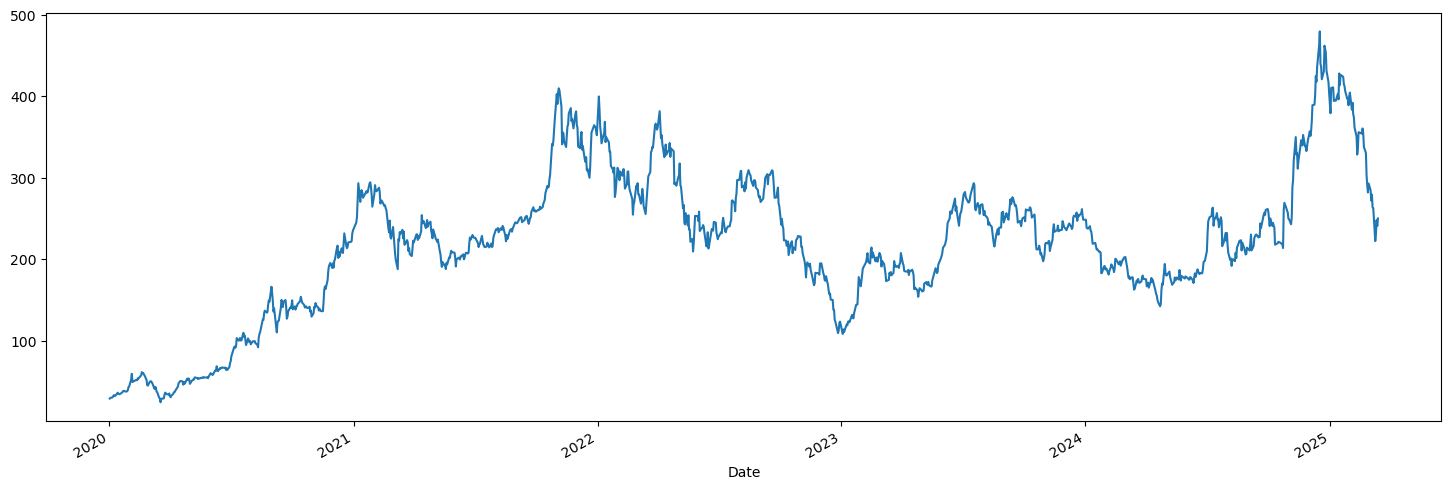

In [107]:
y=data["TSLA"]
y.plot(figsize=(18,6))

<Axes: xlabel='Date'>

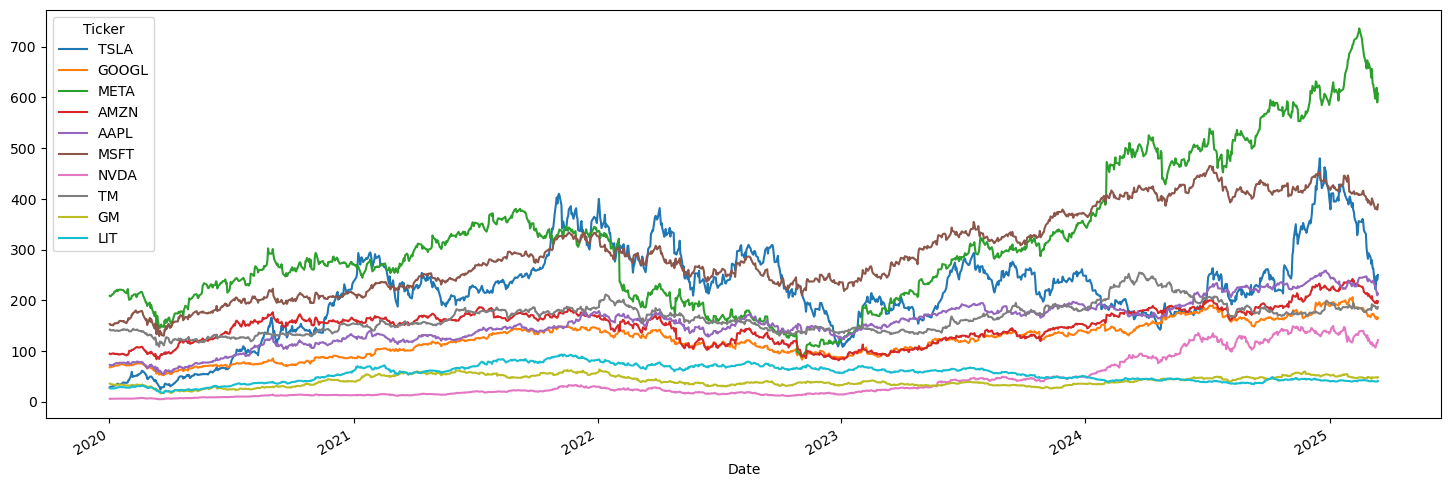

In [108]:
y=data[tickers]
y.plot(figsize=(18,6))

## Evaluation de la disperssion de nos actions

### Disperssion de TESLA

In [109]:
dispersion_moyenne=data["TSLA"].std()/data["TSLA"].mean()*100  #dispersion=std/mean*100
dispersion_moyenne   

39.67126037615812

<strong style="color : yellow">CONCLUSION : </strong> <span style="color: grey"> On a une dispersion de 39.7 pour les actions de TESLA. Cela indique que le cours de TESLA fluctue autour de 40% en moyenne de sa moyenne. On donc une acion plutôt volatille <span>

### Disperssion de l'ensemble des cours

Ticker
TM       17.266384
AMZN     23.114597
GM       25.079862
GOOGL    28.312524
AAPL     28.450988
MSFT     28.556785
LIT      30.796421
TSLA     39.671260
META     44.677468
NVDA     98.780761
dtype: float64


<Axes: xlabel='Ticker'>

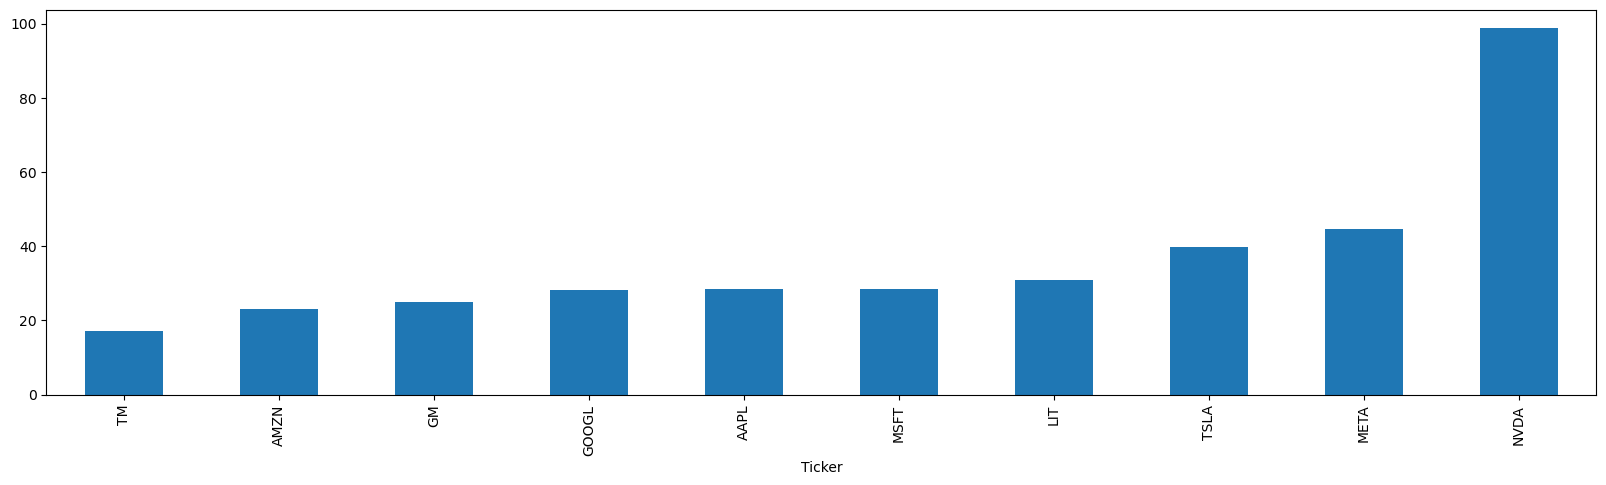

In [110]:
dispersion=data.std(numeric_only=True)/data.mean(numeric_only=True)*100
print(dispersion.sort_values())
dispersion.sort_values().plot(kind="bar", figsize=(20,5))

<strong style="color : yellow">CONCLUSION : </strong> <span style="color: grey"> Bien que le cours de TESLA soit plutôt dispersés, on remarque qu'il y a des cours qui le sont encore plus, notement ceux de <i style="color: orange"> NVIDIA et META<i>

### Gestion des valeurs abérantes

<Axes: >

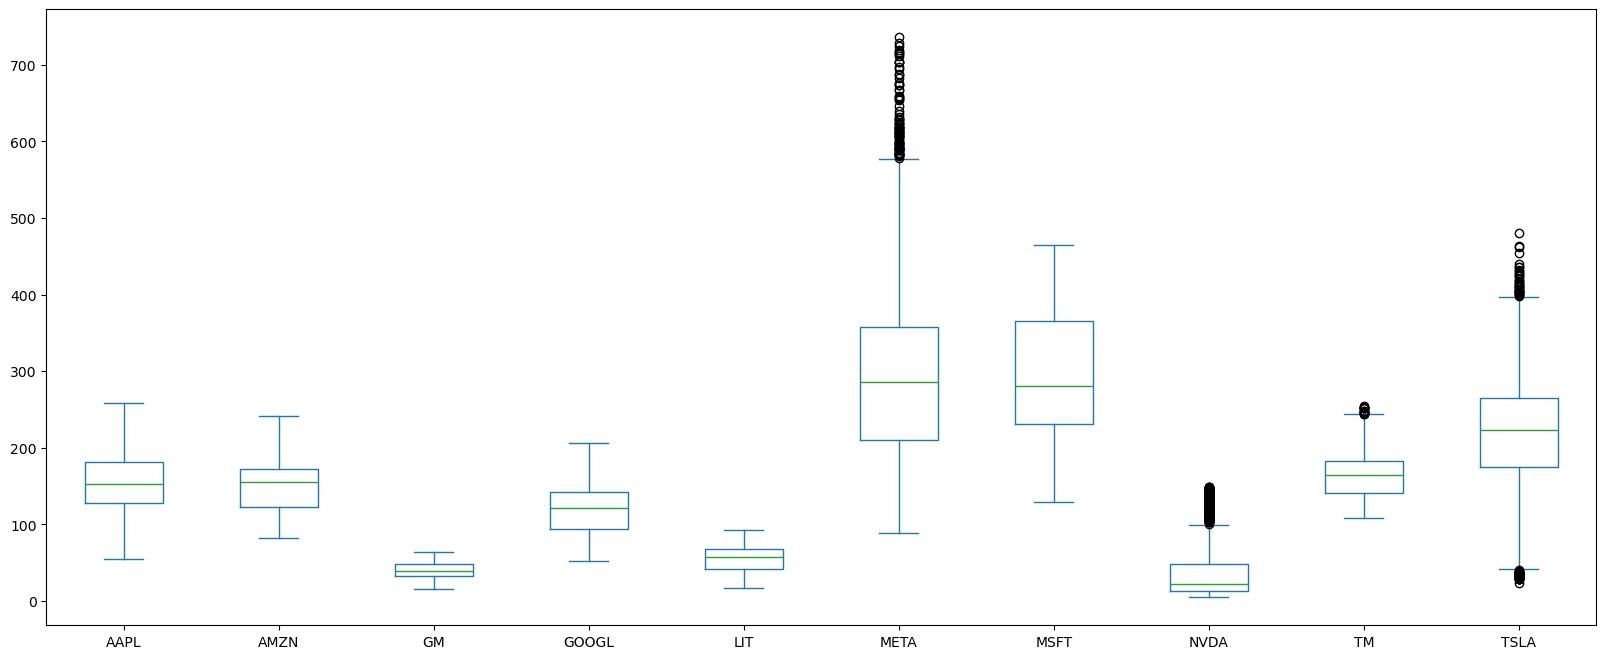

In [111]:
data.plot(kind="box", figsize=(20,8))

<strong style="color : yellow">CONCLUSION : </strong> <span style="color: grey"> On remarque que les actions dont les cours sont les plus dispersés (<i style="color: orange"> TESLA, NVIDIA et META</i>) sont ceux qui présentent le plus de valeures abérantes.

### Traitement des valeures abérantes

In [112]:
def handle_outliers_iqr(df):
    # Copie pour ne pas modifier les données originales
    df_cleaned = df.copy()
    
    # Calcul des bornes IQR pour chaque colonne
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les bornes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remplacer les valeurs aberrantes par les bornes
    df_cleaned = df_cleaned.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    # Calculer le nombre de valeurs modifiées
    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    
    print("Nombre de valeurs aberrantes modifiées par action avant traitement:")
    print(outliers)
    
    outliers = ((df_cleaned < lower_bound) | (df_cleaned > upper_bound)).sum()
    print("\nNombre de valeurs aberrantes modifiées par action après traitement:")
    print(outliers)
    
    return df_cleaned

# Appliquer la correction
data_cleaned = handle_outliers_iqr(data)
data_cleaned.head()

Nombre de valeurs aberrantes modifiées par action avant traitement:
Ticker
AAPL       0
AMZN       0
GM         0
GOOGL      0
LIT        0
META      87
MSFT       0
NVDA     201
TM        15
TSLA      74
dtype: int64

Nombre de valeurs aberrantes modifiées par action après traitement:
Ticker
AAPL     0
AMZN     0
GM       0
GOOGL    0
LIT      0
META     0
MSFT     0
NVDA     0
TM       0
TSLA     0
dtype: int64


Ticker,AAPL,AMZN,GM,GOOGL,LIT,META,MSFT,NVDA,TM,TSLA
Date,,,,,,,,,,
2020-01-02,72.716080,94.900497,35.908218,68.108376,26.657005,208.795944,153.323303,5.972160,142.240005,41.964981
2020-01-03,72.009125,93.748497,34.889950,67.752075,26.291311,207.691147,151.414124,5.876571,140.750000,41.964981
2020-01-06,72.582886,95.143997,34.428848,69.557945,26.406794,211.602707,151.805481,5.901216,140.770004,41.964981
2020-01-07,72.241554,95.343002,33.766018,69.423592,26.762861,212.060547,150.421387,5.972660,141.509995,41.964981
2020-01-08,73.403641,94.598503,33.285702,69.917732,26.204700,214.210419,152.817337,5.983862,141.160004,41.964981


<i> <span style="color: yellow"> Explication : </span> <span style="color: grey"> Les données financieres étants senssibles, nous avons optés pour un remplacement par les bornes des données abérentes afin d'éviter les perte d'information </span> </i>

### Vérification de la distribution des données

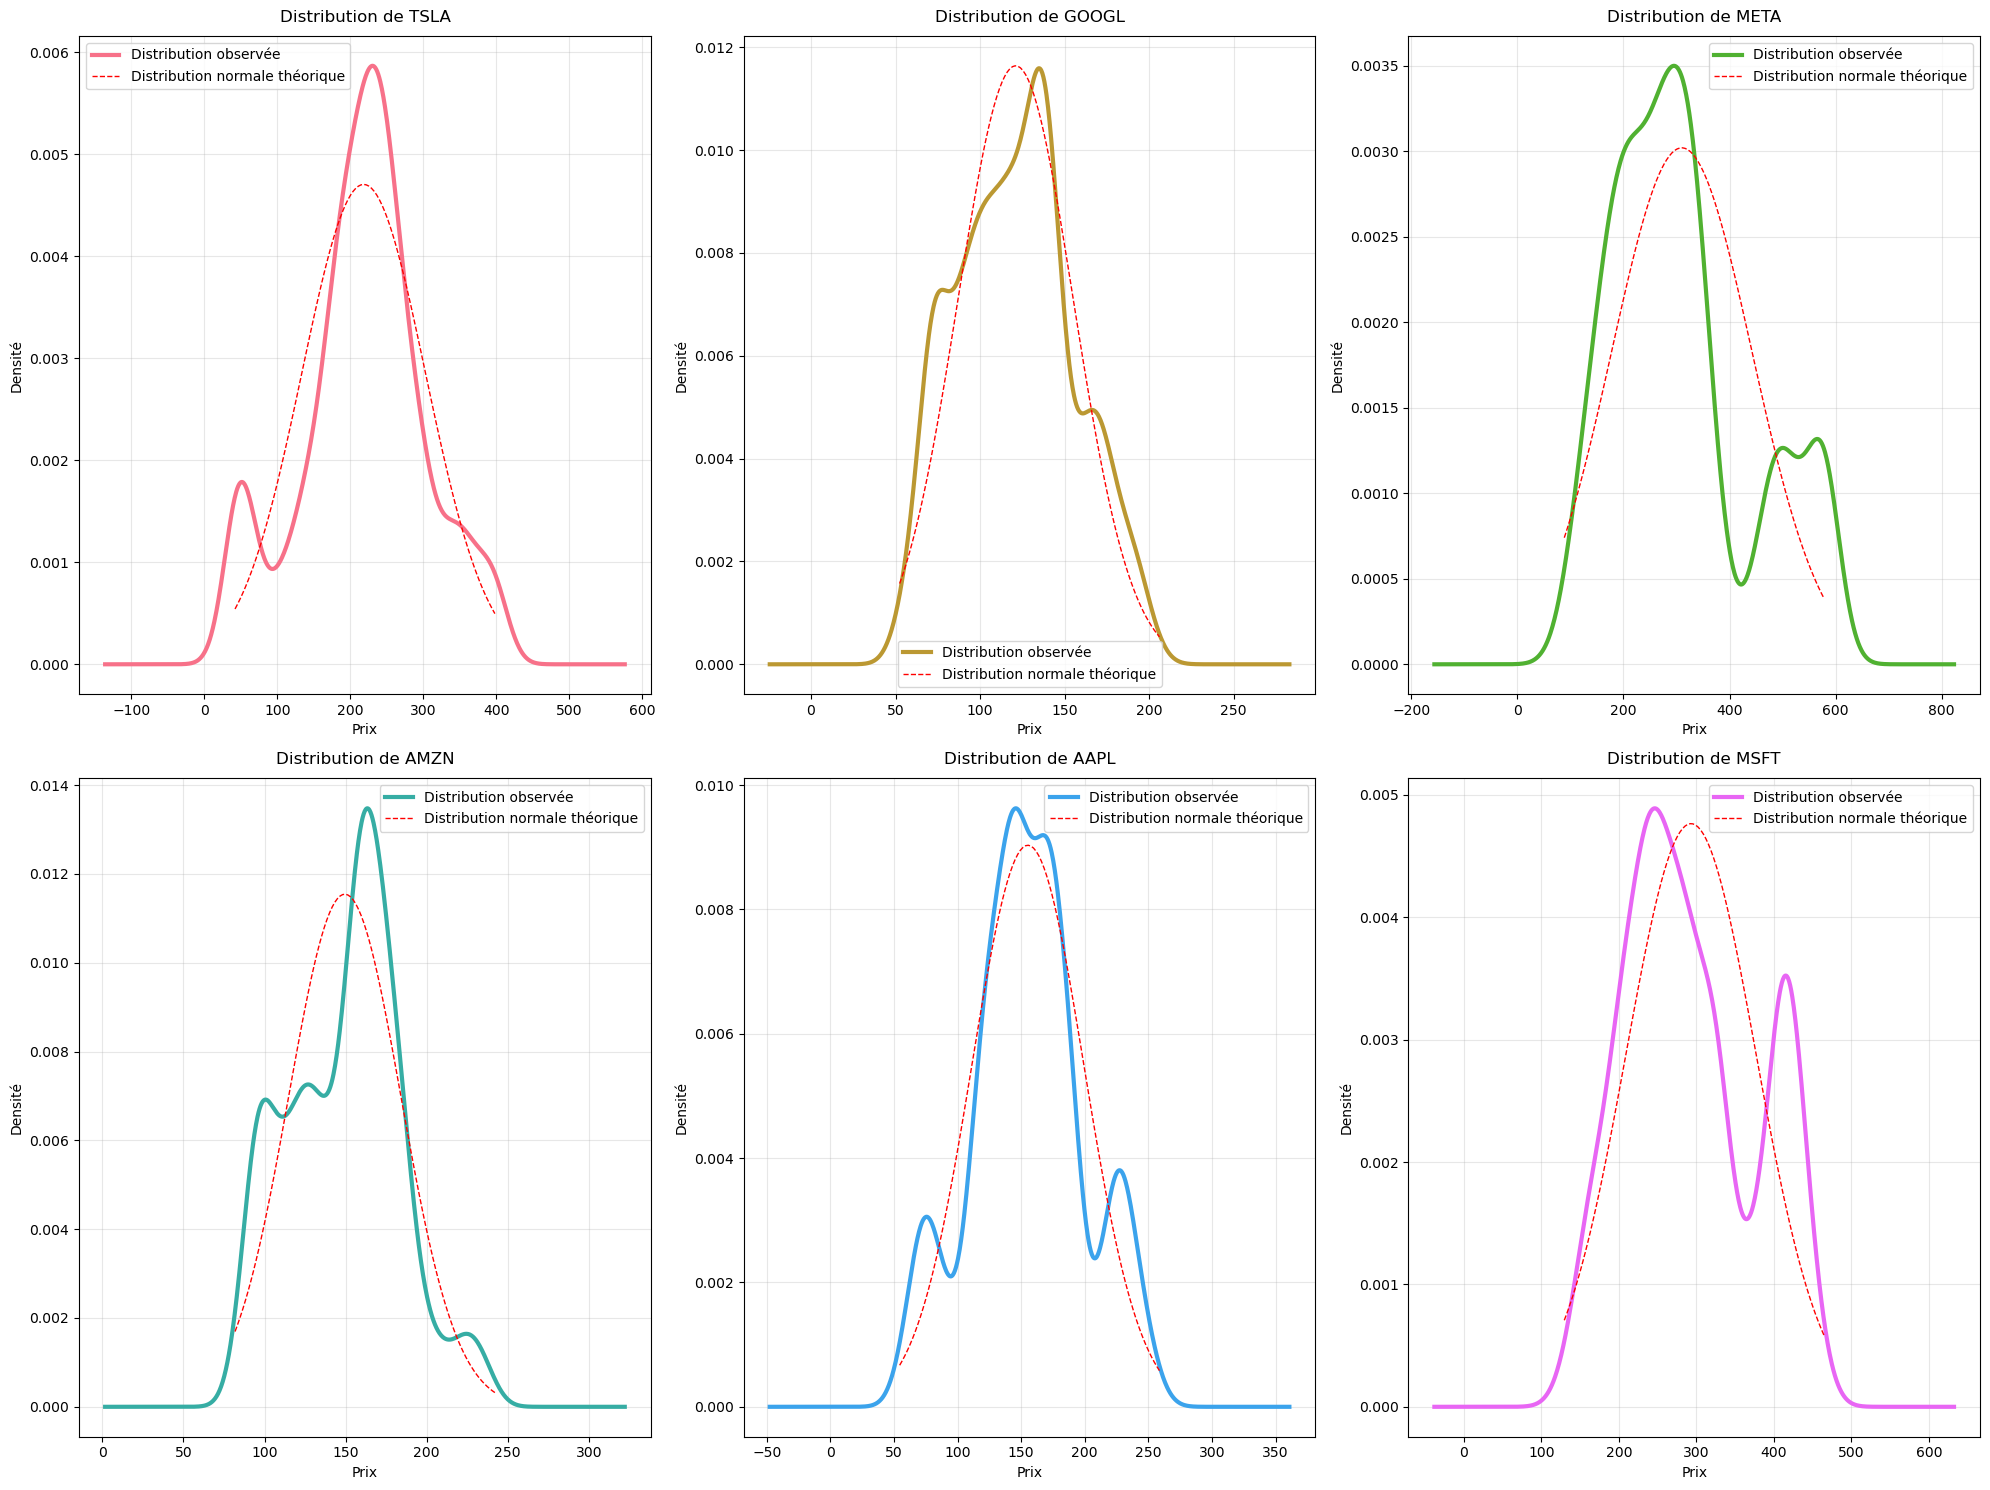

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Créer une figure avec des subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Tracer chaque distribution
for idx, ticker in enumerate(tickers):
    if idx < len(axes):  # Pour éviter les erreurs si on a moins de tickers que de subplots
        # Données pour la courbe normale théorique
        data_series = data_cleaned[ticker]
        mu = data_series.mean()
        sigma = data_series.std()
        
        # Créer les points x pour la courbe normale
        x = np.linspace(data_series.min(), data_series.max(), 100)
        # Calculer la densité de probabilité normale
        normal_density = stats.norm.pdf(x, mu, sigma)
        
        # Tracer la densité des données avec une ligne plus épaisse
        data_series.plot(kind='density', ax=axes[idx], color=sns.color_palette('husl')[idx], 
                        label='Distribution observée', linewidth=3)  # Augmentation de linewidth
        
        # Ajouter la courbe normale théorique
        axes[idx].plot(x, normal_density, 'r--', label='Distribution normale théorique', linewidth=1)

        # Personnaliser chaque subplot
        axes[idx].set_title(f'Distribution de {ticker}', fontsize=12, pad=10)
        axes[idx].set_xlabel('Prix', fontsize=10)
        axes[idx].set_ylabel('Densité', fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()

# Supprimer les subplots vides s'il y en a
for idx in range(len(tickers), len(axes)):
    fig.delaxes(axes[idx])

# Ajuster la mise en page
plt.tight_layout()
plt.show()

#### Test de Shapiro

In [114]:
import scipy
scipy.stats.shapiro(data_cleaned['TSLA'])

ShapiroResult(statistic=0.9712413647029609, pvalue=1.85015465497584e-15)

##### <i> <span style="color: yellow"> Explication : </span> <i style="color: grey"> Une PValue aussi faible nous oblige a infirmer l'hypothèse de normalité sur du cour de TESLA bien que les stats soient incroyablement elevés</i>

In [115]:
data_cleaned.corr(numeric_only=True)["TSLA"]

Ticker
AAPL     0.689535
AMZN     0.525317
GM       0.638678
GOOGL    0.687903
LIT      0.610497
META     0.361404
MSFT     0.547601
NVDA     0.353993
TM       0.461946
TSLA     1.000000
Name: TSLA, dtype: float64

##### <span style="color: yellow;">Explication :</span>  
<i style="color: grey;">On remarque une corrélation plutôt forte entre le cours de <span style="color: orange;">TESLA</span> et ceux de <span style="color: orange;">GM (General Motors), AAPL (Apple), GOOGL (Google), LIT (ETF Lithium)</span>. </br>
Ces cours seraient alors de potentiels <span style="color: orange !important;">variables exogènes</span>.</i>


# Segmentation du marché

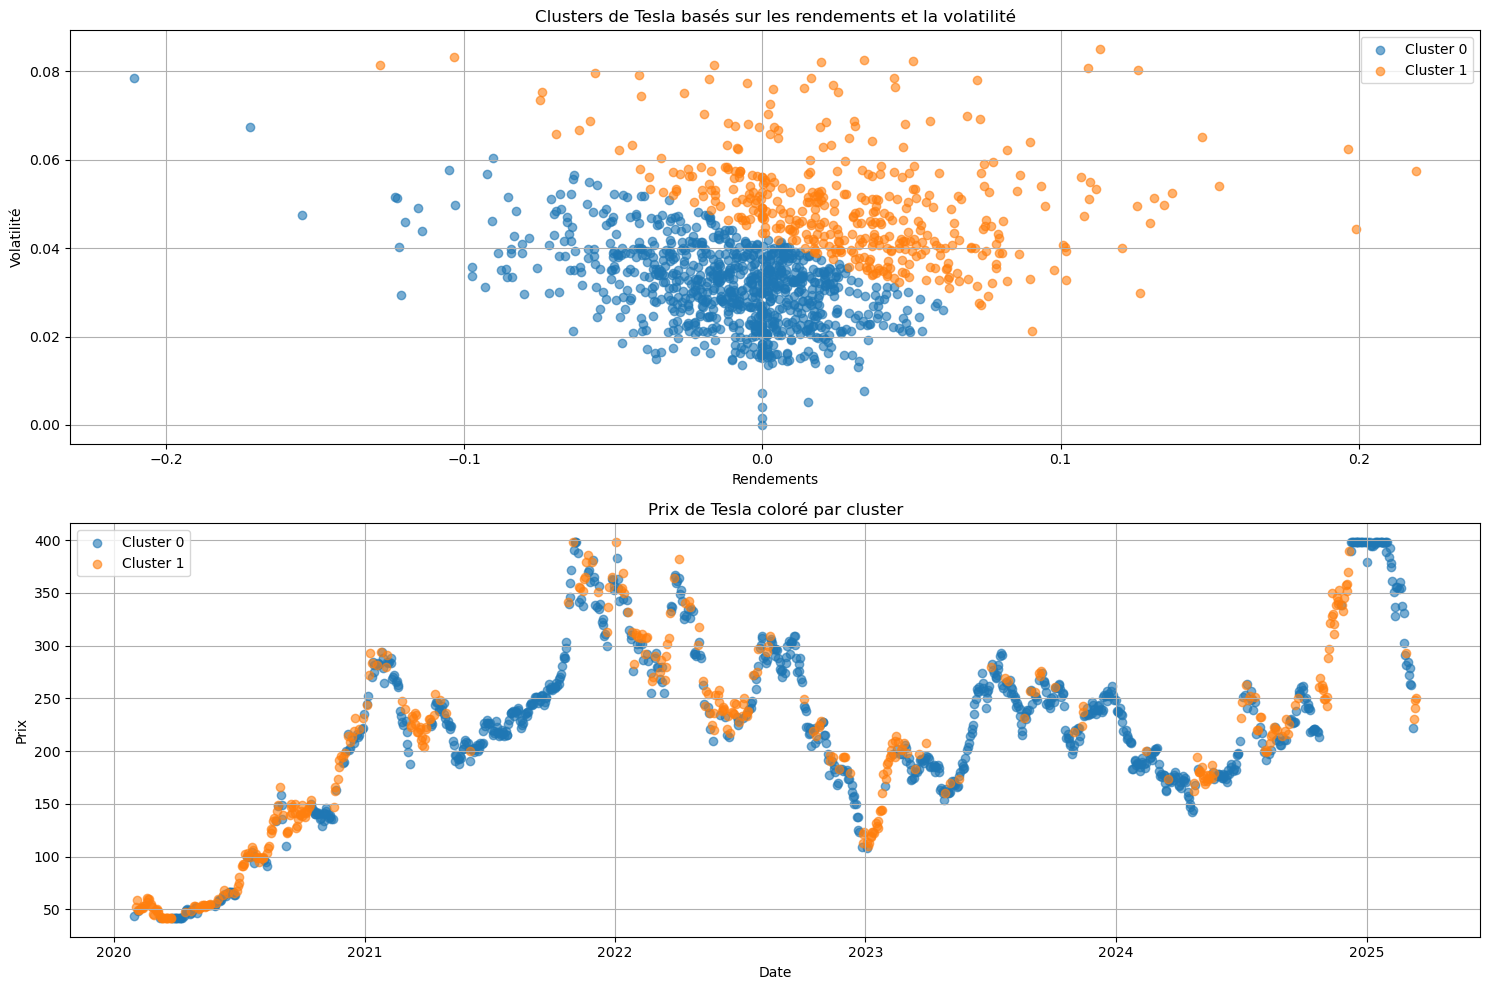


Statistiques par cluster:
        Returns         Volatility        
           mean     std       mean     std
Cluster                                   
0       -0.0113  0.0310     0.0313  0.0092
1        0.0311  0.0418     0.0497  0.0118


In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Préparation des données
# Calculer les rendements et la volatilité
returns = data_cleaned['TSLA'].pct_change()
volatility = returns.rolling(window=20).std()

# Créer le DataFrame pour le clustering
features = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatility
}).dropna()

# Normaliser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Appliquer K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisation
plt.figure(figsize=(15, 10))

# Plot 1: Scatter plot des clusters
plt.subplot(2, 1, 1)
for cluster in [0, 1]:
    mask = features['Cluster'] == cluster
    plt.scatter(features[mask]['Returns'], 
               features[mask]['Volatility'],
               label=f'Cluster {cluster}',
               alpha=0.6)
plt.xlabel('Rendements')
plt.ylabel('Volatilité')
plt.title('Clusters de Tesla basés sur les rendements et la volatilité')
plt.legend()
plt.grid(True)

# Plot 2: Prix de Tesla avec les clusters colorés
plt.subplot(2, 1, 2)
for cluster in [0, 1]:
    mask = features['Cluster'] == cluster
    plt.scatter(features[mask].index, 
               data_cleaned.loc[features[mask].index, 'TSLA'],
               label=f'Cluster {cluster}',
               alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Prix de Tesla coloré par cluster')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyse statistique des clusters
cluster_stats = features.groupby('Cluster').agg({
    'Returns': ['mean', 'std'],
    'Volatility': ['mean', 'std']
}).round(4)

print("\nStatistiques par cluster:")
print(cluster_stats)

##### <span style="color: yellow;">Explication :</span>  
<i style="color: grey;">On a deux clusteurs, <span style="color: orange;">clusteur 0</span> et <span style="color: orange;">clusteur 1</span> qui représentent respectivement les periodes baisiers et haussiers de ce cours. 
On voit qu'en moyenne, le clusteur 1, soit la période de hausse est <span style="color: orange;">1.59</span> plus volatille que c'elle de baisse</i>


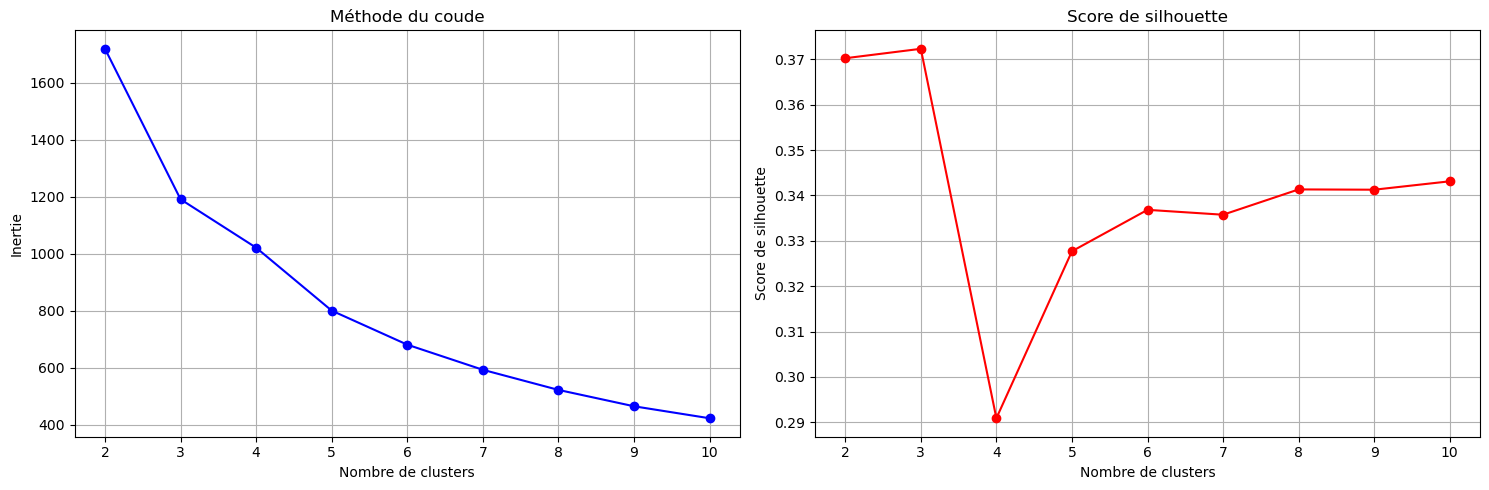


Scores de silhouette pour chaque nombre de clusters :
2 clusters: 0.370
3 clusters: 0.372
4 clusters: 0.291
5 clusters: 0.328
6 clusters: 0.337
7 clusters: 0.336
8 clusters: 0.341
9 clusters: 0.341
10 clusters: 0.343

Meilleur nombre de clusters selon le score de silhouette : 3


In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
returns = data_cleaned['TSLA'].pct_change()
volatility = returns.rolling(window=20).std()
features = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatility
}).dropna()

# Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calcul des métriques pour différents nombres de clusters
n_clusters_range = range(2, 11)
inertias = []
silhouette_scores = []

for n_clusters in n_clusters_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    
    # Inertie (pour méthode du coude)
    inertias.append(kmeans.inertia_)
    
    # Score de silhouette
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Méthode du coude
ax1.plot(n_clusters_range, inertias, 'bo-')
ax1.set_xlabel('Nombre de clusters')
ax1.set_ylabel('Inertie')
ax1.set_title('Méthode du coude')
ax1.grid(True)

# Score de silhouette
ax2.plot(n_clusters_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Nombre de clusters')
ax2.set_ylabel('Score de silhouette')
ax2.set_title('Score de silhouette')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Afficher les scores précis
print("\nScores de silhouette pour chaque nombre de clusters :")
for n, score in zip(n_clusters_range, silhouette_scores):
    print(f"{n} clusters: {score:.3f}")

# Trouver le meilleur score de silhouette
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print(f"\nMeilleur nombre de clusters selon le score de silhouette : {best_n_clusters}")

##### <span style="color: yellow;">Conclusion :</span>  
<i style="color: grey;"> Ce test vien infirmer notre Hypothèse d'étude suivi jusque là selon lequel le cour de TESLA suis 2 régimes (haussier et baissier). Le cours suivrait alors <span style="color: orange;"> 3 régimes</span> d'évolution : <span style="color: orange;"> Régime Haussie, Régime Stable, Régime Baissier</span></i>


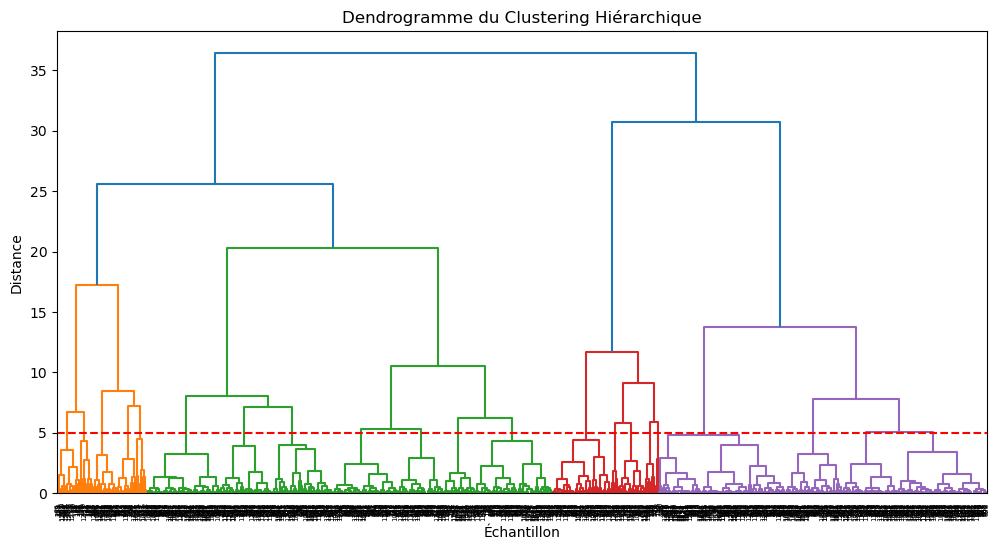

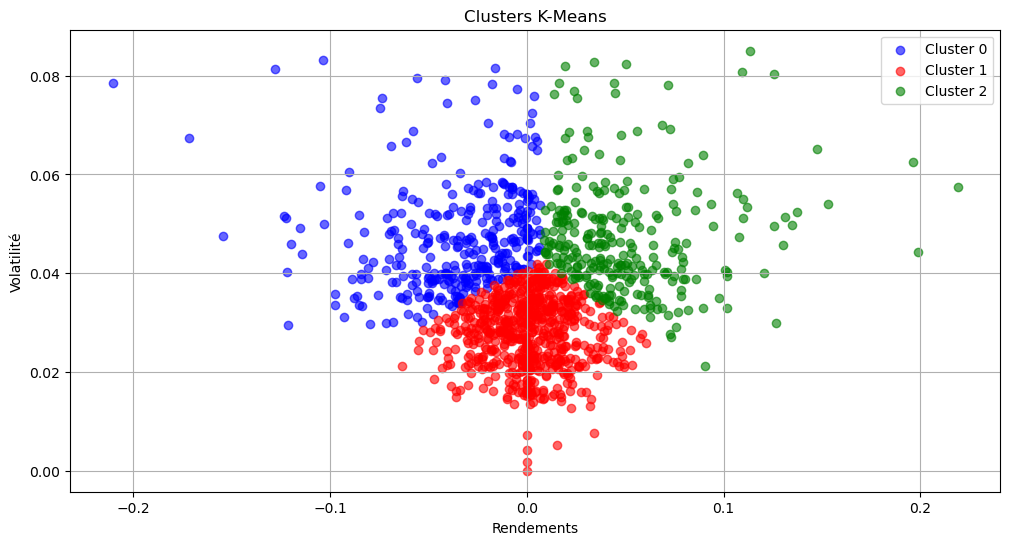

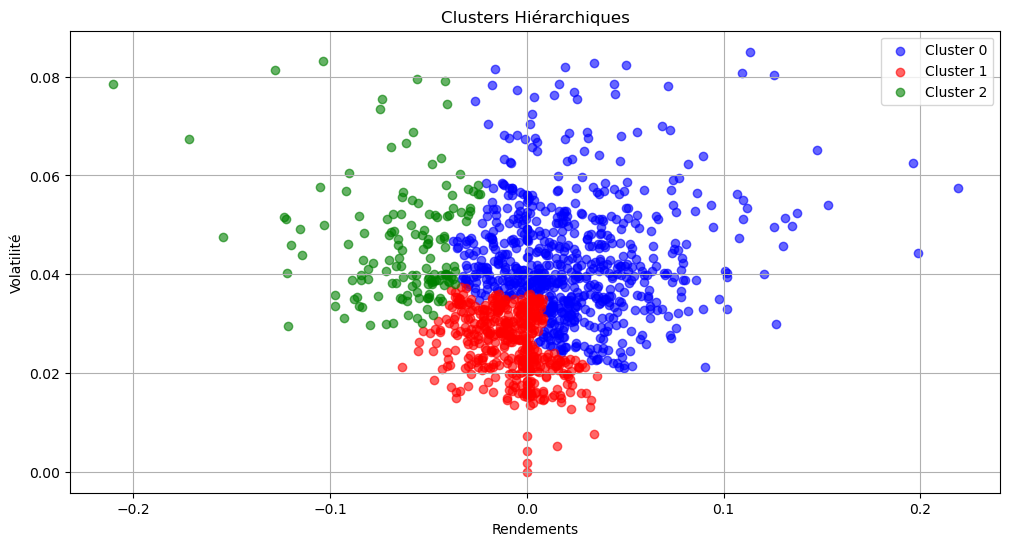


Statistiques K-Means:
        Returns         Volatility        
           mean     std       mean     std
Cluster                                   
0       -0.0355  0.0322     0.0471  0.0106
1        0.0009  0.0199     0.0280  0.0071
2        0.0504  0.0331     0.0471  0.0113

Statistiques Clustering Hiérarchique:
        Returns         Volatility        
           mean     std       mean     std
Cluster                                   
0        0.0230  0.0348     0.0428  0.0116
1       -0.0081  0.0172     0.0258  0.0067
2       -0.0632  0.0287     0.0461  0.0117


In [118]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Préparation des données
returns = data_cleaned['TSLA'].pct_change()
volatility = returns.rolling(window=20).std()
features = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatility
}).dropna()

# Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 1. K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# 2. Clustering Hiérarchique avec 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(features_scaled)

# Graphique 1: Dendrogramme
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(features_scaled, method='ward')
dendrogram(linkage_matrix)
plt.axhline(y=5, color='r', linestyle='--')  # Ligne pour suggérer la coupure à 3 clusters
plt.title('Dendrogramme du Clustering Hiérarchique', fontsize=12)
plt.xlabel('Échantillon', fontsize=10)
plt.ylabel('Distance', fontsize=10)
plt.show()

# Graphique 2: K-Means
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green']
for cluster in [0, 1, 2]:
    mask = kmeans_labels == cluster
    plt.scatter(features[mask]['Returns'], 
               features[mask]['Volatility'],
               label=f'Cluster {cluster}',
               color=colors[cluster],
               alpha=0.6)
plt.title('Clusters K-Means', fontsize=12)
plt.xlabel('Rendements', fontsize=10)
plt.ylabel('Volatilité', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Graphique 3: Clustering Hiérarchique
plt.figure(figsize=(12, 6))
for cluster in [0, 1, 2]:
    mask = hierarchical_labels == cluster
    plt.scatter(features[mask]['Returns'], 
               features[mask]['Volatility'],
               label=f'Cluster {cluster}',
               color=colors[cluster],
               alpha=0.6)
plt.title('Clusters Hiérarchiques', fontsize=12)
plt.xlabel('Rendements', fontsize=10)
plt.ylabel('Volatilité', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Statistiques pour K-Means
print("\nStatistiques K-Means:")
features['Cluster'] = kmeans_labels
kmeans_stats = features.groupby('Cluster').agg({
    'Returns': ['mean', 'std'],
    'Volatility': ['mean', 'std']
}).round(4)
print(kmeans_stats)

# Statistiques pour Clustering Hiérarchique
print("\nStatistiques Clustering Hiérarchique:")
features['Cluster'] = hierarchical_labels
hierarchical_stats = features.groupby('Cluster').agg({
    'Returns': ['mean', 'std'],
    'Volatility': ['mean', 'std']
}).round(4)
print(hierarchical_stats)

##### <span style="color: yellow;">Conclusion :</span>  
<i style="color: grey;"> Ce test nous permet d'identifier les régimes :

<ul>
    <li><span style="color: orange;">Clusteur 0</span> : On a un rendement positif de 2,30% (0.0230) et une volatilité moyenne de 4,28. Il s'agit donc du <span style="color: green"> régime Haussier</span></li>
    <li><span style="color: orange;">Clusteur 1</span> : On a un rendement presque null de -0.81% (-0.0081) et une volatilité moyenne de 2,58%. Il s'agit donc du <span style="color: white"> régime stable</span></li>
    <li><span style="color: orange;">Cluster 2</span> : On a un rendement negatif de -6,32% (-0.0632) et une volatilité moyenne de 4.61. Il s'agit donc du <span style="color: red"> régime baissier</span>.
</ul>

</i>


### Visualisez les clusters sur le plan défini par les deux premières composantes principales

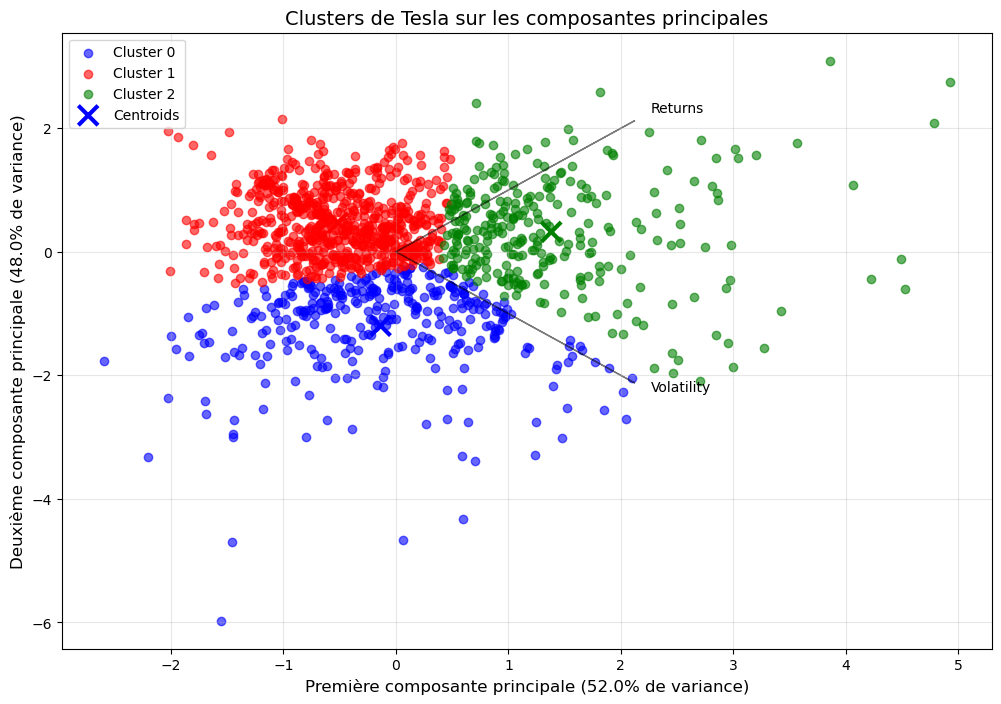


Importance des composantes principales:
Composante 1: 52.0% de la variance totale
Composante 2: 48.0% de la variance totale

Coefficients des composantes principales:
      Returns  Volatility
PC1  0.707107    0.707107
PC2  0.707107   -0.707107


In [119]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données
returns = data_cleaned['TSLA'].pct_change()
volatility = returns.rolling(window=20).std()
features = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatility
}).dropna()

# Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de la PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

# Clustering avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Création du graphique
plt.figure(figsize=(12, 8))

# Définir des couleurs distinctes
colors = ['blue', 'red', 'green']

# Tracer les points pour chaque cluster
for cluster in range(3):
    mask = clusters == cluster
    plt.scatter(components[mask, 0], 
               components[mask, 1],
               c=colors[cluster],
               label=f'Cluster {cluster}',
               alpha=0.6)

# Ajouter les centres des clusters transformés par PCA
centers_transformed = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_transformed[:, 0], 
           centers_transformed[:, 1], 
           c=colors, 
           marker='x', 
           s=200, 
           linewidths=3,
           label='Centroids')

# Personnalisation du graphique
plt.title('Clusters de Tesla sur les composantes principales', fontsize=14)
plt.xlabel(f'Première composante principale ({pca.explained_variance_ratio_[0]:.1%} de variance)', fontsize=12)
plt.ylabel(f'Deuxième composante principale ({pca.explained_variance_ratio_[1]:.1%} de variance)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Ajouter les vecteurs propres
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1*3, comp2*3, color='k', alpha=0.5)
    plt.text(comp1*3.2, comp2*3.2, ['Returns', 'Volatility'][i], color='k')

plt.show()

# Afficher l'importance des composantes
print("\nImportance des composantes principales:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Composante {i+1}: {ratio:.1%} de la variance totale")

# Afficher les coefficients des composantes principales
print("\nCoefficients des composantes principales:")
components_df = pd.DataFrame(
    pca.components_,
    columns=['Returns', 'Volatility'],
    index=['PC1', 'PC2']
)
print(components_df)

##### <i style="color: grey">On a PC1 et PC2 qui sont respoctivement la Mesure l'activité globale du titre et la Mesure la qualité des mouvements. Ces deux composants créer par PCA sont presque égales en importance</i>

## Identification des 5% de jours considérés comme anomalies

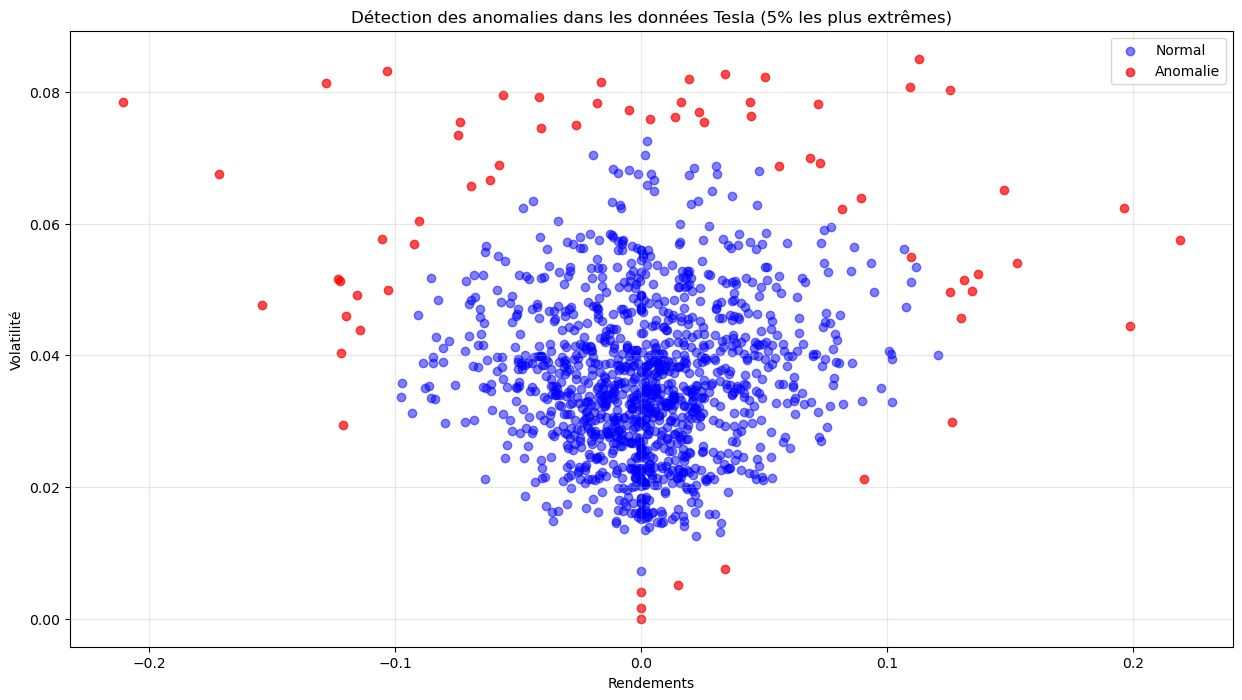


Statistiques des jours normaux vs anomalies:
                       Normal  Anomalie
Nombre de jours     1222.0000   65.0000
Rendement moyen        0.0019    0.0074
Volatilité moyenne     0.0360    0.0599
Rendement min         -0.0975   -0.2106
Rendement max          0.1206    0.2192

Dates des principales anomalies (top 10 par amplitude de rendement):
             Returns  Volatility
Date                            
2024-10-24  0.219190    0.057485
2020-09-08 -0.210628    0.078510
2020-02-03  0.198949    0.044391
2021-03-09  0.196412    0.062441
2020-02-05 -0.171758    0.067482
2025-03-10 -0.154262    0.047627
2024-04-29  0.153069    0.053983
2024-11-06  0.147510    0.065100
2020-02-04  0.137256    0.052391
2020-07-06  0.134794    0.049795


In [120]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
returns = data_cleaned['TSLA'].pct_change()
volatility = returns.rolling(window=20).std()
features = pd.DataFrame({
    'Returns': returns,
    'Volatility': volatility
}).dropna()

# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Configuration du modèle pour détecter 5% d'anomalies
contamination = 0.05
iso_forest = IsolationForest(contamination=contamination, random_state=42)
anomalies = iso_forest.fit_predict(features_scaled)

# Convertir les prédictions (-1 pour anomalie, 1 pour normal) en booléen
is_anomaly = anomalies == -1

# Création du graphique
plt.figure(figsize=(15, 8))

# Points normaux
plt.scatter(features[~is_anomaly]['Returns'], 
           features[~is_anomaly]['Volatility'],
           c='blue', 
           label='Normal',
           alpha=0.5)

# Points anomalies
plt.scatter(features[is_anomaly]['Returns'], 
           features[is_anomaly]['Volatility'],
           c='red',
           label='Anomalie',
           alpha=0.7)

plt.title('Détection des anomalies dans les données Tesla (5% les plus extrêmes)', fontsize=12)
plt.xlabel('Rendements', fontsize=10)
plt.ylabel('Volatilité', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Statistiques sur les anomalies
print("\nStatistiques des jours normaux vs anomalies:")
stats_df = pd.DataFrame({
    'Normal': {
        'Nombre de jours': (~is_anomaly).sum(),
        'Rendement moyen': features[~is_anomaly]['Returns'].mean(),
        'Volatilité moyenne': features[~is_anomaly]['Volatility'].mean(),
        'Rendement min': features[~is_anomaly]['Returns'].min(),
        'Rendement max': features[~is_anomaly]['Returns'].max()
    },
    'Anomalie': {
        'Nombre de jours': is_anomaly.sum(),
        'Rendement moyen': features[is_anomaly]['Returns'].mean(),
        'Volatilité moyenne': features[is_anomaly]['Volatility'].mean(),
        'Rendement min': features[is_anomaly]['Returns'].min(),
        'Rendement max': features[is_anomaly]['Returns'].max()
    }
}).round(4)
print(stats_df)

# Afficher les dates des anomalies
print("\nDates des principales anomalies (top 10 par amplitude de rendement):")
anomaly_dates = features[is_anomaly].sort_values('Returns', key=abs, ascending=False)
print(anomaly_dates.head(10))

### <i>
Les causes typiques des anomalies pour Tesla peuvent être classées en plusieurs catégories :

<li>Événements Spécifiques à Tesla :</li>
<li>Annonces d'Elon Musk (tweets, décisions)</li>
<li>Rapports de production/livraison</li>
<li>Lancements de nouveaux produits</li>
<li>Split d'actions</li>
<li>Inclusion dans le S&P 500 (décembre 2020)</li>
<li>Événements du Secteur Automobile :</li>
<li>Annonces de concurrents</li>
<li>Nouvelles réglementations</li>
<li>Prix des matières premières (lithium)</li>
<li>Problèmes de chaîne d'approvisionnement</li>
<li>Événements Macroéconomiques :</li>
<li>Crise du COVID-19</li>
<li>Changements de taux d'intérêt</li>
<li>Tensions géopolitiques</li>
<li>Crises économiques</li>
<li>Événements Technologiques :</li>
<li>Avancées en IA/conduite autonome</li>
<li>Innovations en batteries</li>
<li>Cybersécurité</li>
<li>Problèmes techniques</li>
</i>

# Partie B

## Analyse des données de Tesla

In [121]:
tesla_df = data_cleaned[['TSLA']]
# tesla_df = tesla_df.reset_index(drop=False)
tesla_df

Ticker,TSLA
Date,
2020-01-02,41.964981
2020-01-03,41.964981
2020-01-06,41.964981
2020-01-07,41.964981
2020-01-08,41.964981
...,...
2025-03-10,222.149994
2025-03-11,230.580002
2025-03-12,248.089996


<Axes: xlabel='Date'>

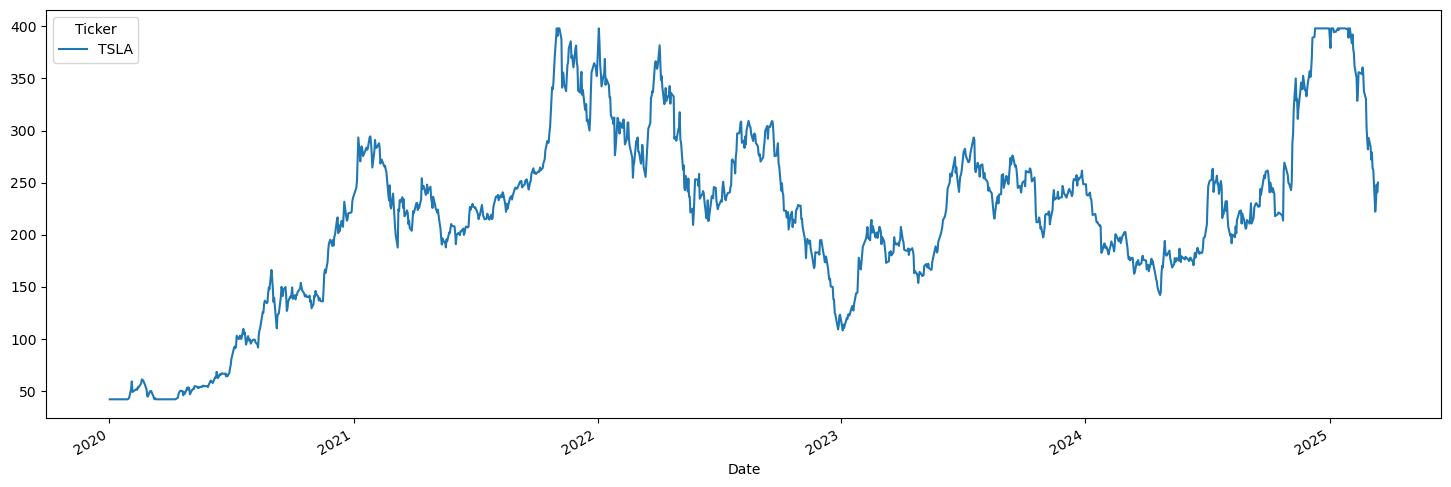

In [122]:
tesla_df.plot(figsize=(18,6))

In [123]:
tesla_df.describe()

Ticker,TSLA
count,1307.000000
mean,218.244909
std,84.802502
min,41.964981
25%,175.500000
50%,222.686661
75%,264.523346
max,398.058365


### Vérification si la distribution respect la lois normale

<Figure size 1800x800 with 0 Axes>

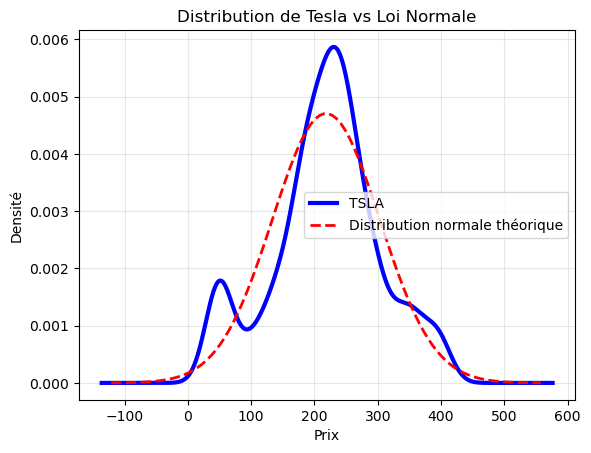

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculer la moyenne et l'écart-type des données
mu = tesla_df.mean()
sigma = tesla_df.std()

# Créer des points x qui s'étendent plus loin que les données
# On prend 4 écarts-types de chaque côté de la moyenne pour couvrir 99.99% des données
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Calculer la densité de probabilité normale
normal_density = stats.norm.pdf(x, mu, sigma)

# Créer la figure
plt.figure(figsize=(18, 8))

# Tracer la distribution observée
tesla_df.plot(kind='density', color='blue', linewidth=3, 
                         label='Distribution observée')

# Ajouter la courbe normale théorique
plt.plot(x, normal_density, 'r--', linewidth=2, 
         label='Distribution normale théorique')

# Personnalisation du graphique
plt.title('Distribution de Tesla vs Loi Normale', fontsize=12)
plt.xlabel('Prix', fontsize=10)
plt.ylabel('Densité', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.show()

### Test de Shapiro

In [125]:
from scipy import stats

# Test de Shapiro-Wilk sur les données Tesla
shapiro_test = stats.shapiro(data_cleaned['TSLA'])

# Affichage des résultats
print("Test de Shapiro-Wilk pour la normalité :")
print(f"Statistique : {shapiro_test.statistic:.4f}")
print(f"P-value : {shapiro_test.pvalue:.4e}")

# Interprétation automatique
print("\nInterprétation :")
if shapiro_test.pvalue < 0.05:
    print("La distribution n'est PAS normale (p-value < 0.05)")
else:
    print("La distribution est normale (p-value ≥ 0.05)")

# Calcul des statistiques descriptives supplémentaires
skewness = stats.skew(data_cleaned['TSLA'])
kurtosis = stats.kurtosis(data_cleaned['TSLA'])

print(f"\nAsymétrie (Skewness) : {skewness:.4f}")
print(f"Kurtosis : {kurtosis:.4f}")

Test de Shapiro-Wilk pour la normalité :
Statistique : 0.9712
P-value : 1.8502e-15

Interprétation :
La distribution n'est PAS normale (p-value < 0.05)

Asymétrie (Skewness) : -0.1798
Kurtosis : -0.0714


#### <i style="color: grrey">
<li>On une PValue < 0.05 pour le test de Shapiro, donc la distribution n'est pas normale.</li>
<li>On un Skewness très proche de 0 : La distribution est PRESQUE symétrique.</li>
<li>On un Kurtosis très proche de 0 : La distribution est visiblement TRÈS proche d'une distribution normale.</li>
<i>

### Test de Dickey-Fuller et de ADF

In [126]:
from statsmodels.tsa.stattools import adfuller

# Test ADF sur les prix de Tesla
result = adfuller(data_cleaned['TSLA'])

# Affichage des résultats détaillés
print('Test de Dickey-Fuller Augmenté :')
print('===============================')
print(f'Statistique de test : {result[0]:.4f}')
print(f'P-value : {result[1]:.4f}')
print('Valeurs critiques :')
for key, value in result[4].items():
    print(f'\t{key}: {value:.4f}')

# Interprétation automatique
print('\nInterprétation :')
if result[1] < 0.05:
    print('→ La série est STATIONNAIRE (p-value < 0.05)')
else:
    print('→ La série est NON STATIONNAIRE (p-value ≥ 0.05)')

# Test sur les rendements aussi (souvent plus pertinent)
returns = data_cleaned['TSLA'].pct_change().dropna()
result_returns = adfuller(returns)

print('\nTest ADF sur les rendements :')
print('============================')
print(f'Statistique de test : {result_returns[0]:.4f}')
print(f'P-value : {result_returns[1]:.4f}')
print('Valeurs critiques :')
for key, value in result_returns[4].items():
    print(f'\t{key}: {value:.4f}')

print('\nInterprétation des rendements :')
if result_returns[1] < 0.05:
    print('→ Les rendements sont STATIONNAIRES (p-value < 0.05)')
else:
    print('→ Les rendements sont NON STATIONNAIRES (p-value ≥ 0.05)')

Test de Dickey-Fuller Augmenté :
Statistique de test : -2.7602
P-value : 0.0642
Valeurs critiques :
	1%: -3.4354
	5%: -2.8638
	10%: -2.5680

Interprétation :
→ La série est NON STATIONNAIRE (p-value ≥ 0.05)

Test ADF sur les rendements :
Statistique de test : -10.3207
P-value : 0.0000
Valeurs critiques :
	1%: -3.4354
	5%: -2.8638
	10%: -2.5680

Interprétation des rendements :
→ Les rendements sont STATIONNAIRES (p-value < 0.05)


## Model SARIMAX

### Standardisation

In [127]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardisation des prix de clôture
scaler = StandardScaler()
tesla_data_scaled = pd.DataFrame(
    scaler.fit_transform(tesla_df),
    columns=['TSLA'],
    index=data.index
)
tesla_data_scaled

,TSLA
Date,
2020-01-02,-2.079507
2020-01-03,-2.079507
2020-01-06,-2.079507
2020-01-07,-2.079507
2020-01-08,-2.079507
...,...
2025-03-10,0.046067
2025-03-11,0.145512
2025-03-12,0.352071


## Model SERIMAX

#### 1. Determination de la saisonnalité

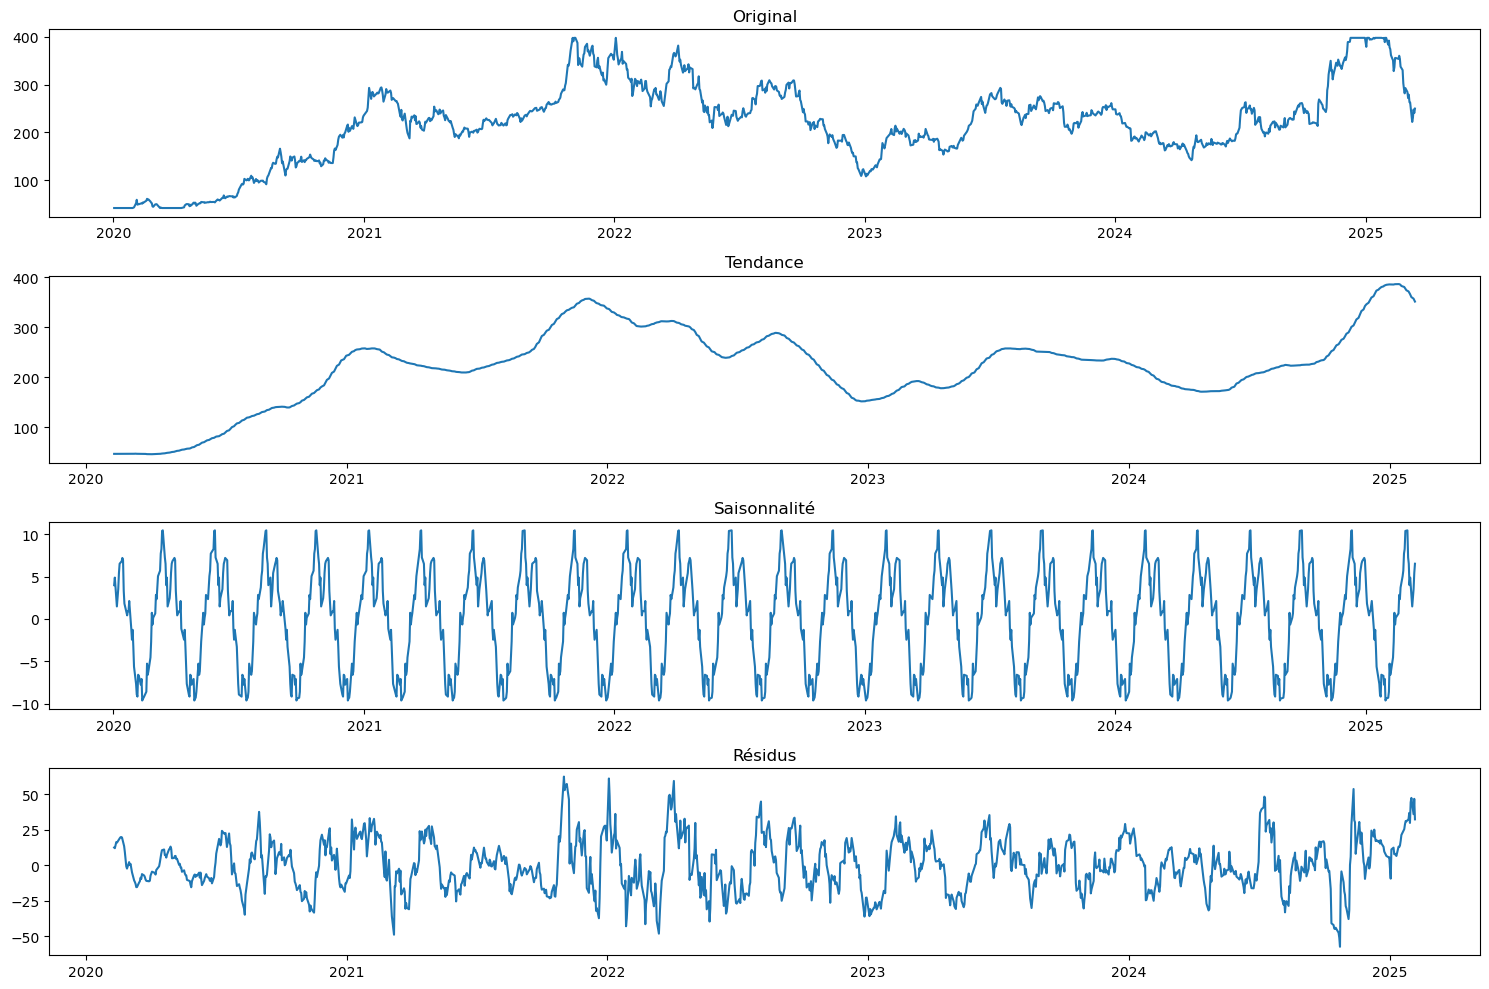

In [128]:
decomposition = seasonal_decompose(data_cleaned['TSLA'], period=best_period)

# Visualisation de la décomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(data_cleaned['TSLA'])
plt.title('Original')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendance')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Saisonnalité')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Résidus')
plt.tight_layout()
plt.show()

### Test de la meilleur saisonalité

### Choix des parametres

In [134]:
#comment choisir les meilleurs parametres (p,d,q)(P,D,Q)(s) pour le modele

import pmdarima   #(p,d,q)  #(P,D,Q, s)  
pmdarima.arima.auto_arima(tesla_data_scaled,                          
    start_p=0, max_p=12, #chercher le meilleur parametre p entre 0 et 12
    start_q=0, max_q=12,
    start_d=0, max_d=12,  
    start_P=0, max_P=12,
    start_Q=0, max_Q=12,
    start_D=0, max_D=12,  
    m=16,
    trace=True,  # montrer le progrès
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[16] intercept   : AIC=-2248.707, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[16] intercept   : AIC=-2245.617, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[16] intercept   : AIC=-2245.610, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[16]             : AIC=-2250.265, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[16] intercept   : AIC=-2247.022, Time=2.60 sec
 ARIMA(0,1,0)(0,0,1)[16] intercept   : AIC=-2247.043, Time=1.49 sec
 ARIMA(0,1,0)(1,0,1)[16] intercept   : AIC=-2245.518, Time=1.57 sec
 ARIMA(1,1,0)(0,0,0)[16] intercept   : AIC=-2247.267, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[16] intercept   : AIC=-2247.240, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[16] intercept   : AIC=-2245.666, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[16]          
Total fit time: 7.563 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 16),
      suppress_warnings=True, with_intercept=False)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.91092D-01    |proj g|=  1.83120D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     44      2     0     0   2.812D-04  -8.911D-01
  F = -0.89109261891477898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 1045
Model:               SARIMAX(0, 1, 0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/pytho

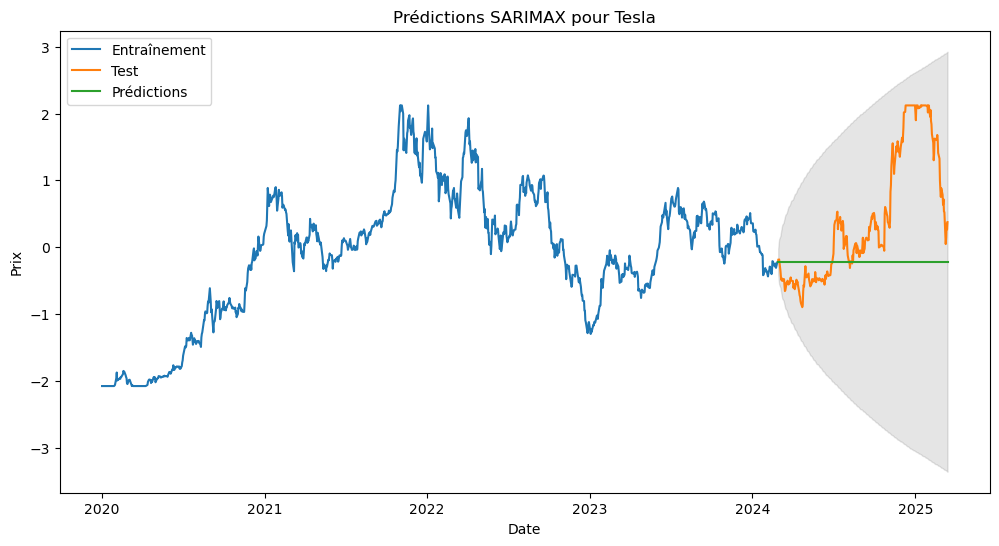


Métriques d'évaluation :
RMSE: 1.14
MAE: 0.83
R²: -10.0470


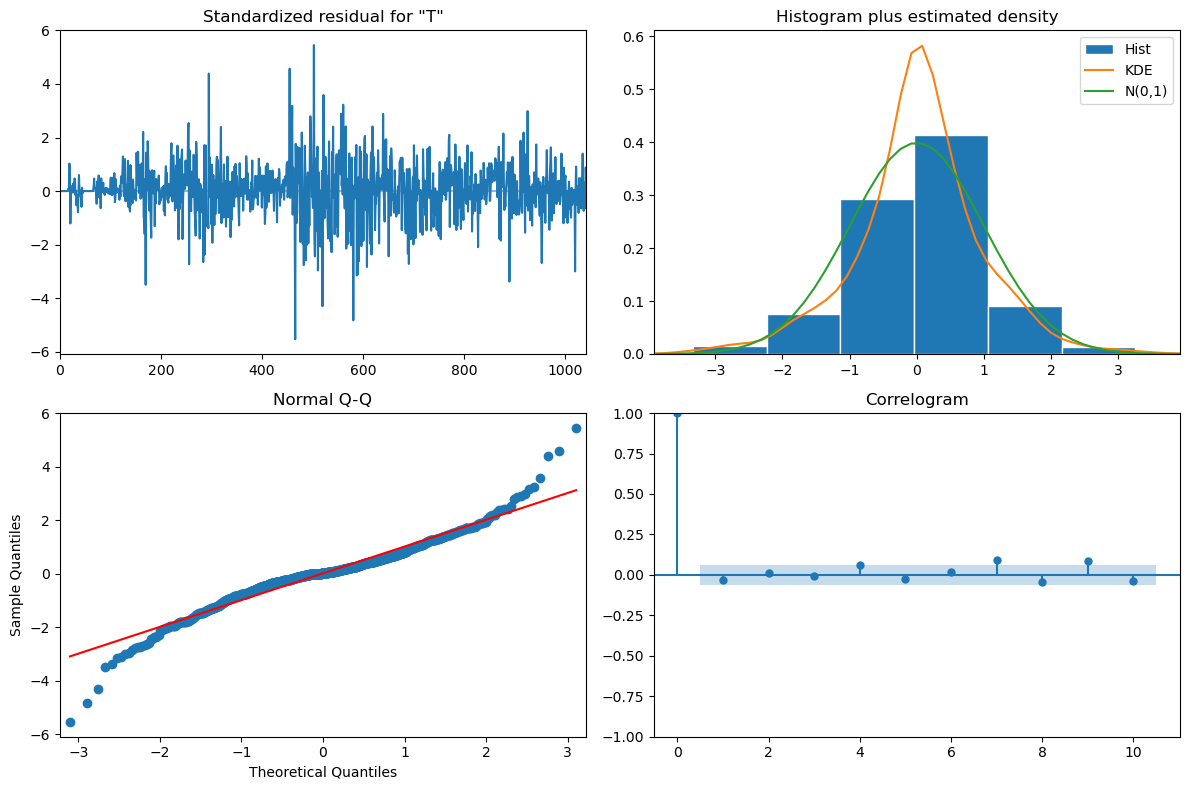

In [144]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Préparation des données
# On utilise 80% des données pour l'entraînement
train_size = int(len(tesla_data_scaled) * 0.8)
train = tesla_data_scaled[:train_size]
test = tesla_data_scaled[train_size:]

# 2. Création et entraînement du modèle SARIMAX
# (p,d,q)x(P,D,Q,s) = (1,1,1)x(1,1,1,5)
model = SARIMAX(train,
                order=(0, 1, 0),
                seasonal_order=(0, 0, 0, 16),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# 3. Affichage du résumé du modèle
print(results.summary())

# 4. Prédictions
predictions = results.get_forecast(steps=len(test))
pred_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# 5. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entraînement')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred_mean, label='Prédictions')
plt.fill_between(test.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='k',
                 alpha=.1)

plt.title('Prédictions SARIMAX pour Tesla')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

# 6. Évaluation du modèle
mse = mean_squared_error(test, pred_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, pred_mean)
r2 = r2_score(test_endog, pred_mean)

print('\nMétriques d\'évaluation :')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')
# 7. Diagnostic des résidus
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Influence des autres actions

### Correlation

<Axes: xlabel='Ticker', ylabel='Ticker'>

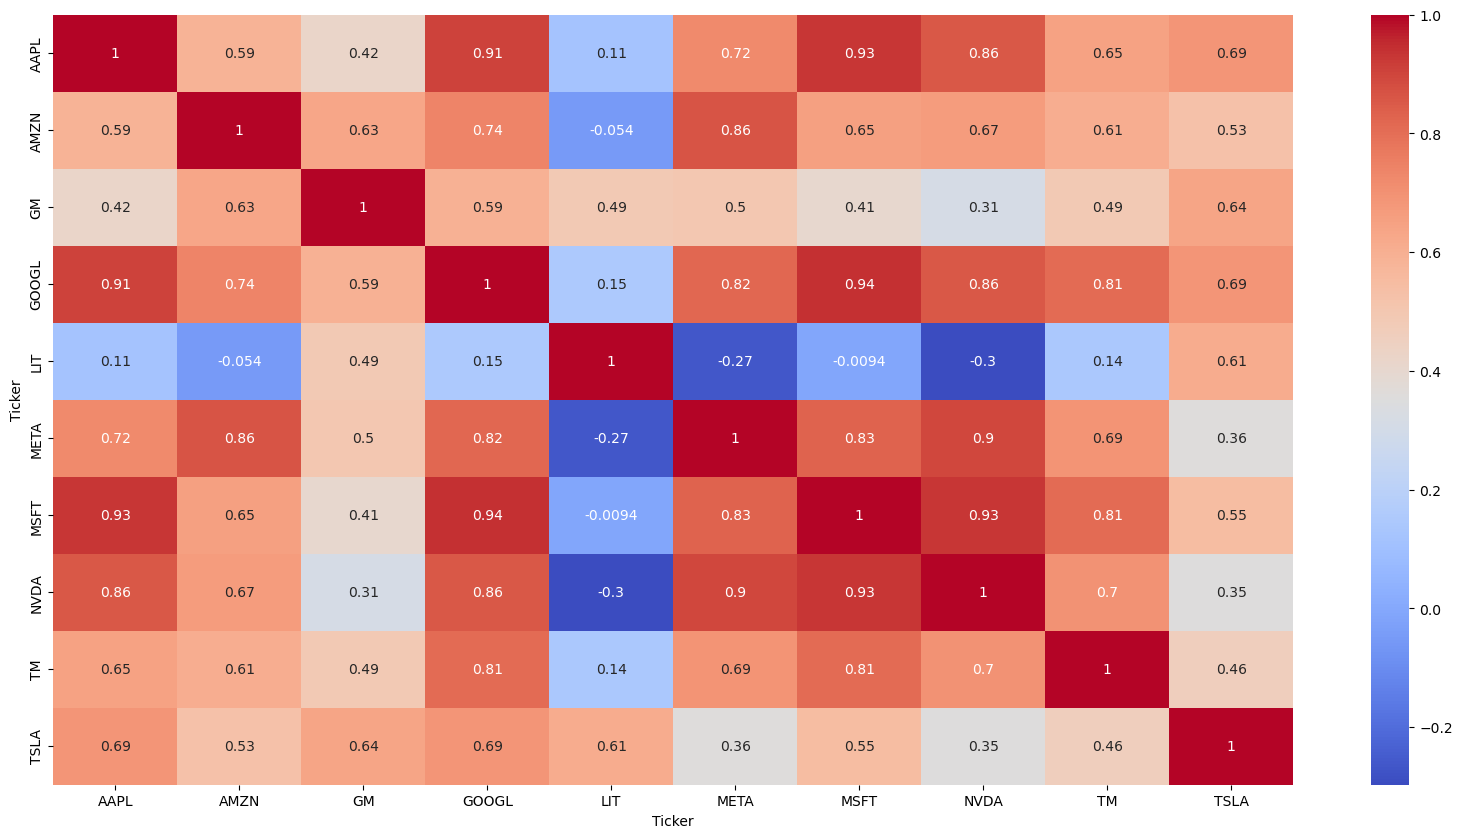

In [131]:
plt.figure(figsize=(20,10))
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")

### Test de Granger

In [136]:
# Reprenons le heatmap avec une explication plus détaillée
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
import numpy as np


maxlag=16   #conseil: prenez toujours la frequence de la serie temporelle
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


data4=data.select_dtypes(exclude=['object']) # je prends toutes les donnees numeriques
data4=data4.fillna(data_cleaned.mean()) # j impute les valeurs manquantes par la moyenne
data4.head()


Ticker,AAPL,AMZN,GM,GOOGL,LIT,META,MSFT,NVDA,TM,TSLA
Date,,,,,,,,,,
2020-01-02,72.716080,94.900497,35.908218,68.108376,26.657005,208.795944,153.323303,5.972160,142.240005,28.684000
2020-01-03,72.009125,93.748497,34.889950,67.752075,26.291311,207.691147,151.414124,5.876571,140.750000,29.534000
2020-01-06,72.582886,95.143997,34.428848,69.557945,26.406794,211.602707,151.805481,5.901216,140.770004,30.102667
2020-01-07,72.241554,95.343002,33.766018,69.423592,26.762861,212.060547,150.421387,5.972660,141.509995,31.270666
2020-01-08,73.403641,94.598503,33.285702,69.917732,26.204700,214.210419,152.817337,5.983862,141.160004,32.809334


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since function

<Axes: >

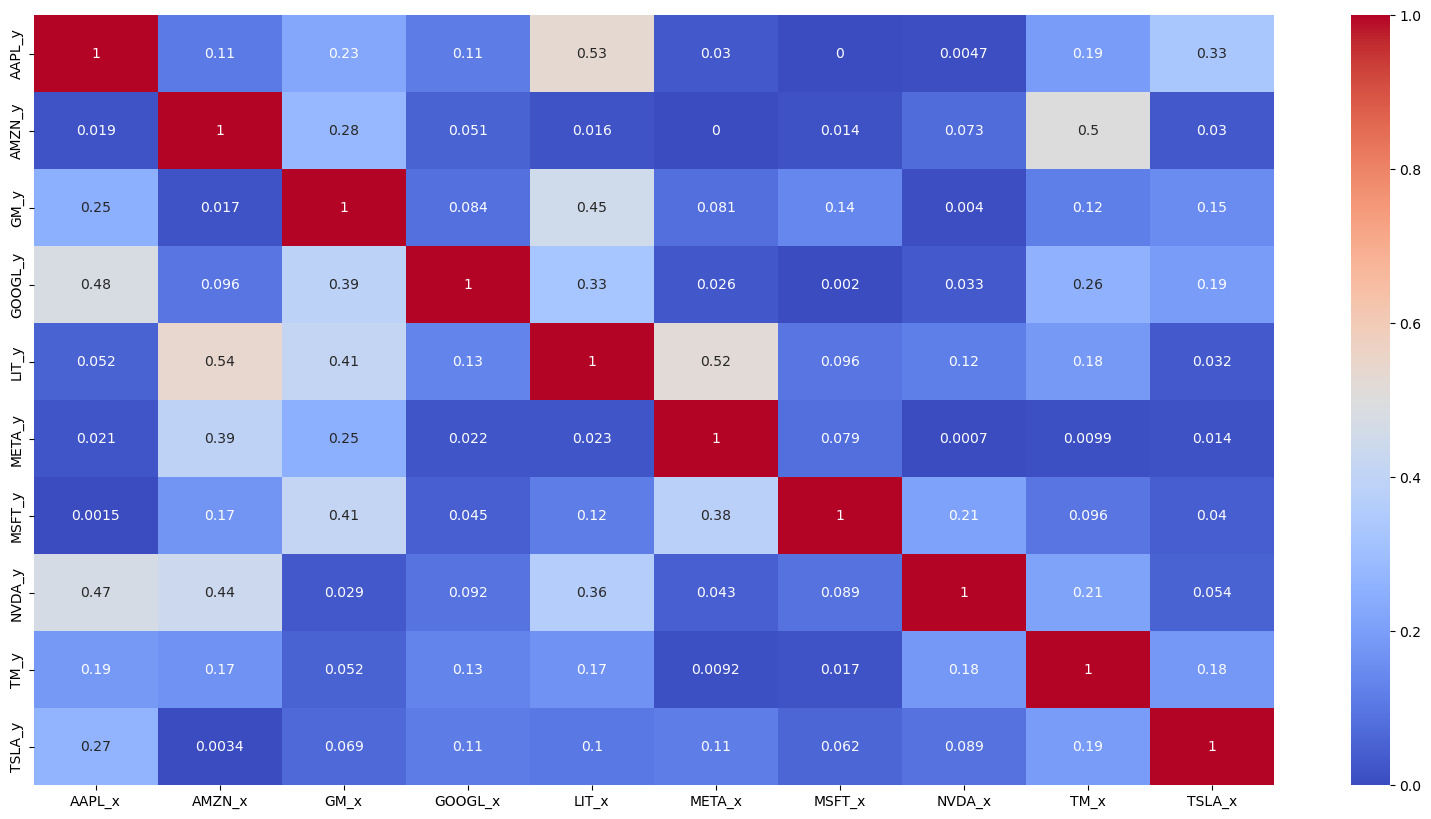

In [137]:
matrice_causalite=grangers_causation_matrix(data4, variables = data4.columns)
plt.figure(figsize=(20,10))
sns.heatmap(matrice_causalite, annot=True, cmap="coolwarm")

##### <i style="color: grey">Ce heartmap rejet notre Hypothèse selon laquelle GM (General Motors), AAPL (Apple), GOOGL (Google), LIT (ETF Lithium) serait de potentiels variables exogenes. La seule variable exogene ici, c'est le cours de <span style='color: yellow'> AMZN </span> </i>

## Integration des variables exogenes

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49719D+00    |proj g|=  1.00031D-01

At iterate    5    f=  3.45273D+00    |proj g|=  4.11105D-02

At iterate   10    f=  3.39796D+00    |proj g|=  1.14582D-01

At iterate   15    f=  3.38551D+00    |proj g|=  3.49792D-03

At iterate   20    f=  3.38550D+00    |proj g|=  2.74721D-04

At iterate   25    f=  3.38548D+00    |proj g|=  8.18862D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     44      1     0     0   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


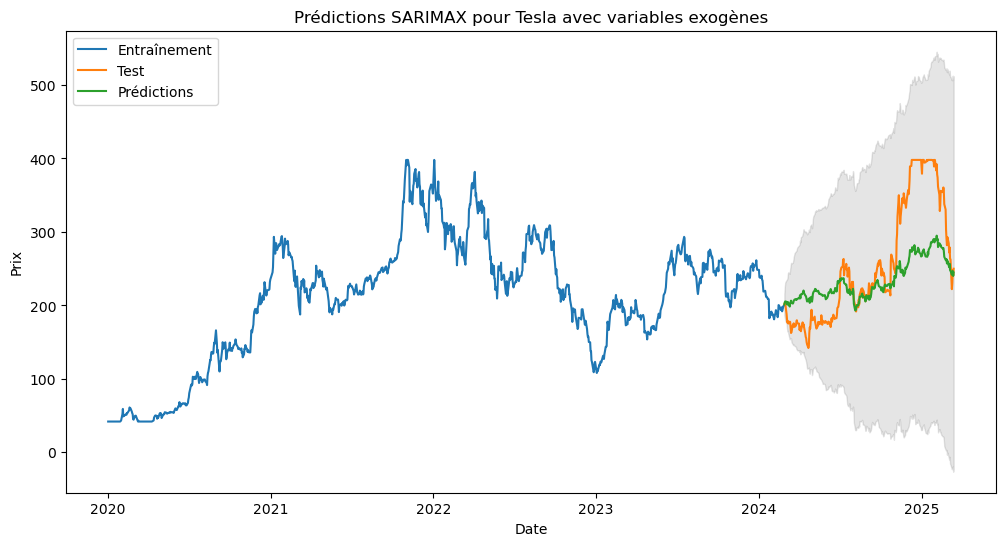


Métriques d'évaluation :
RMSE: 60.03
MAE: 45.62
R²: 0.4402

Importance des variables exogènes :
       Variable  Coefficient   P-value
sigma2     AMZN    58.475106  0.960306


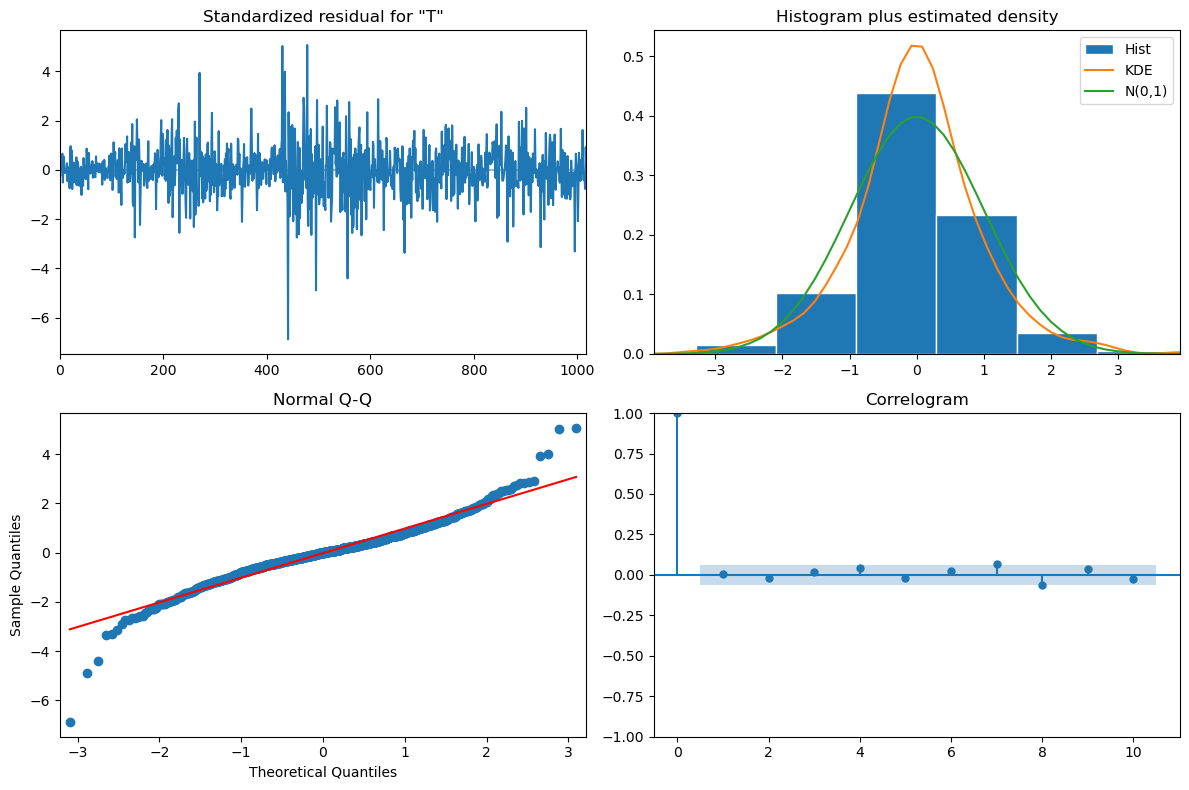

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Préparation des données
# Variables exogènes (toutes les autres actions)
exog_variables = data_cleaned.drop([
    'TSLA',
    'GOOGL',
    'META',
    # 'AMZN',
    'AAPL',
    'MSFT',
    'NVDA',
    'TM',
    'GM',
    'LIT'
], axis=1)

# Variable à prédire
endog = data_cleaned['TSLA']

# Split train/test
train_size = int(len(data_cleaned) * 0.8)
train_endog = endog[:train_size]
test_endog = endog[train_size:]
train_exog = exog_variables[:train_size]
test_exog = exog_variables[train_size:]

# 2. Création et entraînement du modèle SARIMAX
model = SARIMAX(train_endog,
                exog=train_exog,
                order=(1, 1, 1),           # (p,d,q)
                seasonal_order=(1, 1, 1, 12), # (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# 3. Affichage du résumé du modèle
print(results.summary())

# 4. Prédictions
predictions = results.get_forecast(steps=len(test_endog), exog=test_exog)
pred_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# 5. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train_endog.index, train_endog, label='Entraînement')
plt.plot(test_endog.index, test_endog, label='Test')
plt.plot(test_endog.index, pred_mean, label='Prédictions')
plt.fill_between(test_endog.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='k',
                 alpha=.1)

plt.title('Prédictions SARIMAX pour Tesla avec variables exogènes')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

# 6. Évaluation du modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(test_endog, pred_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_endog, pred_mean)
r2 = r2_score(test_endog, pred_mean)

print('\nMétriques d\'évaluation :')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.4f}')

# 7. Analyse de l'importance des variables exogènes
exog_params = pd.DataFrame({
    'Variable': exog_variables.columns,
    'Coefficient': results.params[len(results.params)-len(exog_variables.columns):],
    'P-value': results.pvalues[len(results.pvalues)-len(exog_variables.columns):]
})
exog_params = exog_params.sort_values('P-value')

print('\nImportance des variables exogènes :')
print(exog_params)

# 8. Visualisation des résidus
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

#### <i>On remarque qu'en ajoutant uniquement AMZN comme variable exogene, on réussi à partie de d'un de <span style="color: yellow">-10</span> à plus de <span style="color: yellow">45</span> de coefficient de détermination (mesure de performance) </i>

# DEEP LEARNING

### Facebook Prophet

19:48:15 - cmdstanpy - INFO - Chain [1] start processing
19:48:16 - cmdstanpy - INFO - Chain [1] done processing



Métriques de précision Prophet :
RMSE: $103.54
MAE: $74.65
R²: -0.6653
MAPE: 25.91%

Précision directionnelle: 41.76%
Précision de l'intervalle de confiance: 29.01%


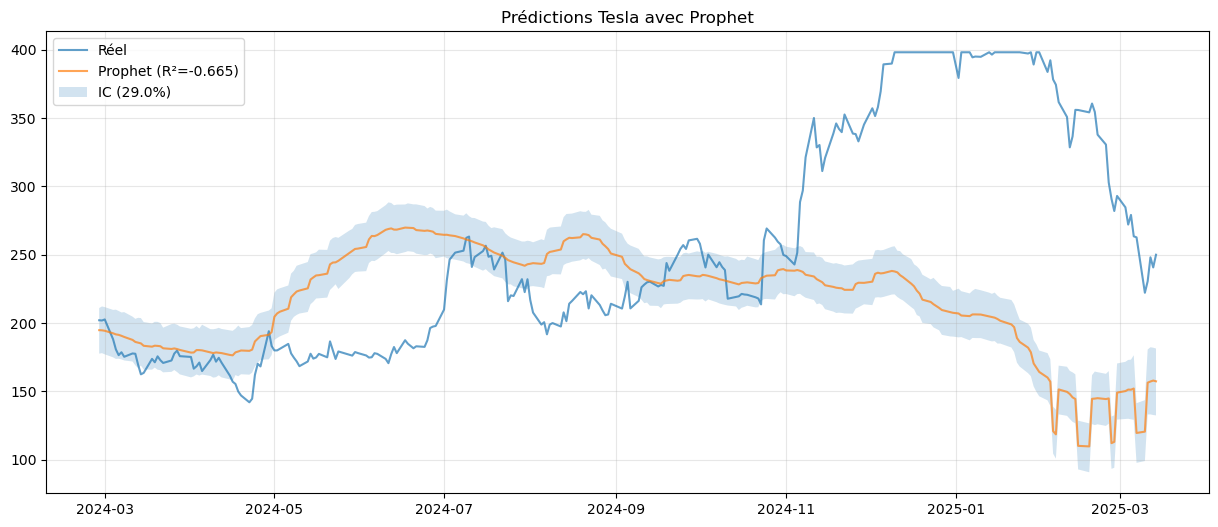

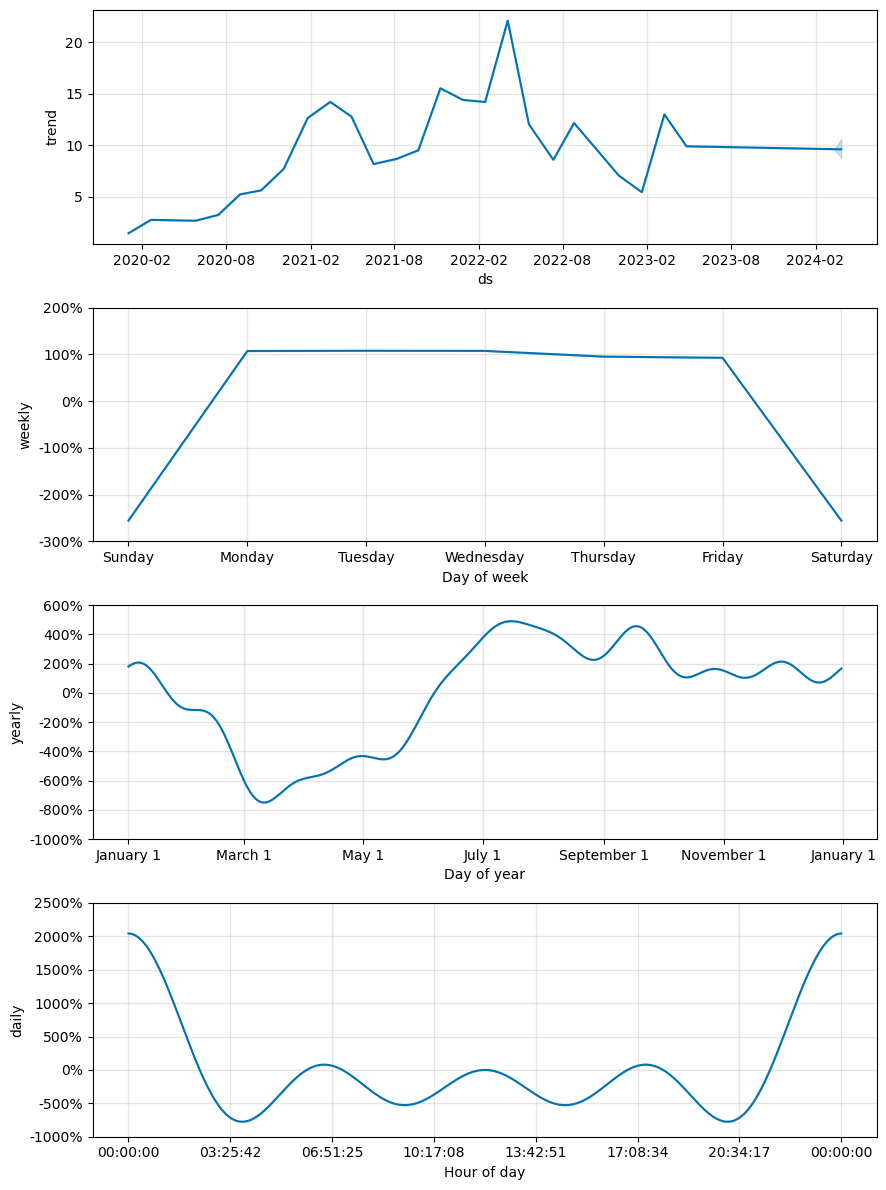


Résumé des performances Prophet :
• Précision globale (R²): -0.665
• Erreur moyenne: $74.65
• Précision directionnelle: 41.8%
• Fiabilité des intervalles: 29.0%


In [166]:
# Import correct
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Préparation des données pour Prophet
df_prophet = pd.DataFrame({
    'ds': data_cleaned.index,  # dates
    'y': data_cleaned['TSLA']  # valeurs Tesla
})

# 2. Split train/test
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]

# 3. Création du modèle Prophet
model = Prophet(
    yearly_seasonality=True,    
    weekly_seasonality=True,    
    daily_seasonality=True,     
    seasonality_mode='multiplicative'  
)

# 4. Entraînement du modèle
model.fit(train_df)

# 5. Création des prédictions
future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)

# 6. Calcul des métriques de précision
# Extraire les prédictions pour la période de test
test_predictions = forecast.tail(len(test_df))
y_true = test_df['y'].values
y_pred = test_predictions['yhat'].values

# Métriques de base
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\nMétriques de précision Prophet :")
print("============================")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Précision directionnelle
direction_true = np.sign(np.diff(y_true))
direction_pred = np.sign(np.diff(y_pred))
dir_acc = np.mean(direction_true == direction_pred) * 100
print(f"\nPrécision directionnelle: {dir_acc:.2f}%")

# Précision des intervalles de confiance
in_interval = np.sum((y_true >= test_predictions['yhat_lower']) & 
                    (y_true <= test_predictions['yhat_upper']))
interval_accuracy = in_interval / len(y_true) * 100
print(f"Précision de l'intervalle de confiance: {interval_accuracy:.2f}%")

# 7. Visualisation des résultats avec métriques
plt.figure(figsize=(15, 6))
plt.plot(test_df['ds'], y_true, label='Réel', alpha=0.7)
plt.plot(test_df['ds'], y_pred, label=f'Prophet (R²={r2:.3f})', alpha=0.7)
plt.fill_between(test_df['ds'],
                 test_predictions['yhat_lower'],
                 test_predictions['yhat_upper'],
                 alpha=0.2,
                 label=f'IC ({interval_accuracy:.1f}%)')
plt.title('Prédictions Tesla avec Prophet')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 8. Composantes du modèle
fig2 = model.plot_components(forecast)
plt.show()

# 9. Résumé final des performances
print("\nRésumé des performances Prophet :")
print("==============================")
print(f"• Précision globale (R²): {r2:.3f}")
print(f"• Erreur moyenne: ${mae:.2f}")
print(f"• Précision directionnelle: {dir_acc:.1f}%")
print(f"• Fiabilité des intervalles: {interval_accuracy:.1f}%")

### LSTM

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0892 - val_loss: 0.0032
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109 - val_loss: 0.0039
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0081 - val_loss: 0.0033
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0072 - val_loss: 0.0026
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0066 - val_loss: 0.0023
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0100 - val_loss: 0.0085
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss

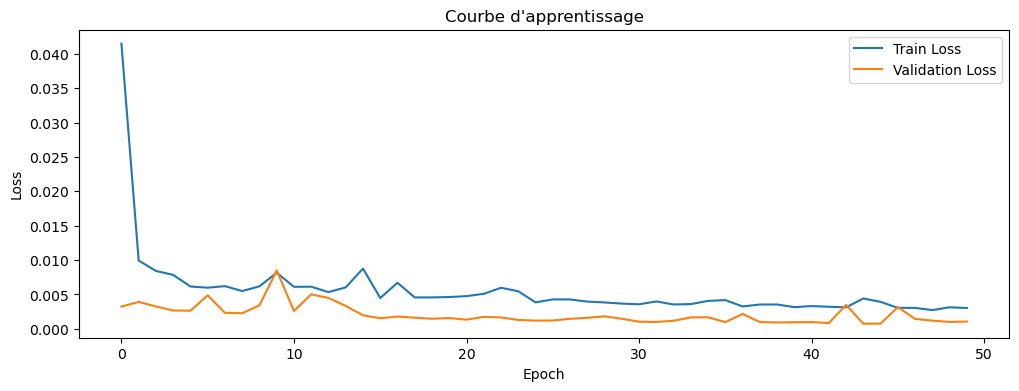

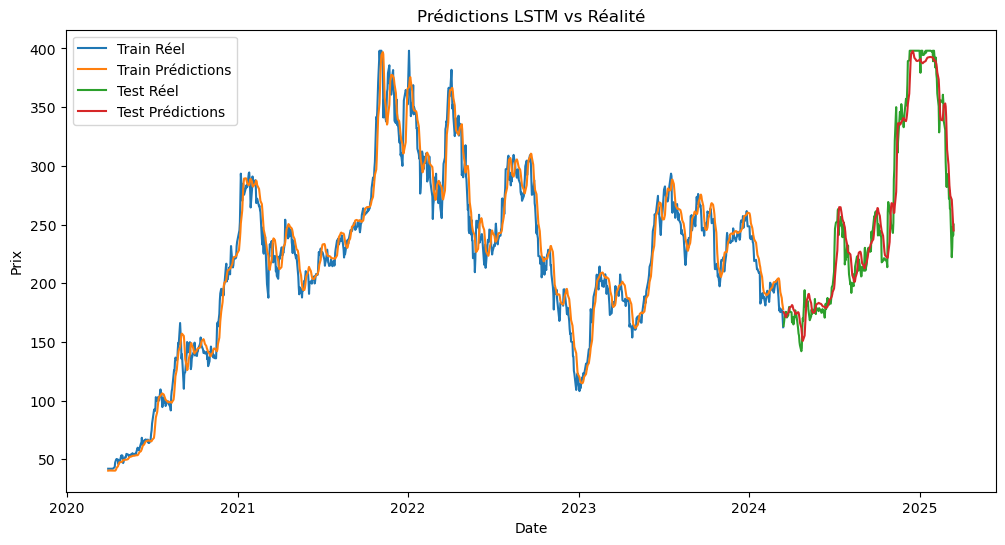

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

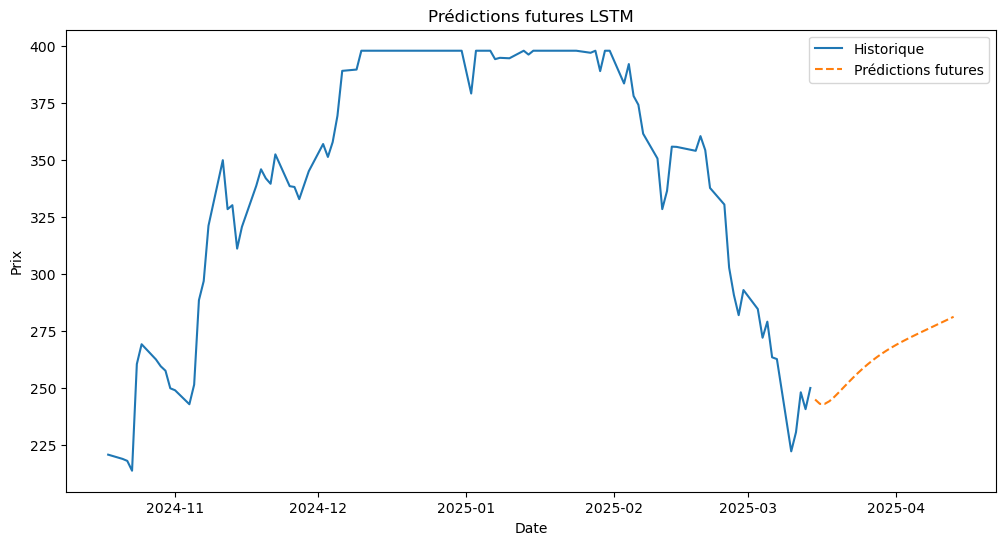

In [174]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Préparation des données
def prepare_data_for_lstm(data, lookback=60):
    # Normalisation
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['TSLA'].values.reshape(-1, 1))
    
    # Création des séquences
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i])
        y.append(scaled_data[i])
    
    X, y = np.array(X), np.array(y)
    
    return X, y, scaler

# 2. Split des données
lookback = 60  # 60 jours de contexte
X, y, scaler = prepare_data_for_lstm(data_cleaned, lookback)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Création du modèle LSTM
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compilation
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
print(lstm_model.summary())

# 4. Entraînement
history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 5. Prédictions
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

# Inverse scaling
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# 6. Évaluation
# Métriques
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
train_r2 = r2_score(y_train_inv, train_predict)
test_r2 = r2_score(y_test_inv, test_predict)

print('\nMétriques d\'évaluation :')
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train R²: {train_r2:.4f}')
print(f'Test R²: {test_r2:.4f}')

# 7. Visualisations
# Courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prédictions vs Réalité
plt.figure(figsize=(12, 6))
# Données d'entraînement
plt.plot(data_cleaned.index[lookback:train_size+lookback], 
         y_train_inv, 
         label='Train Réel')
plt.plot(data_cleaned.index[lookback:train_size+lookback], 
         train_predict, 
         label='Train Prédictions')
# Données de test
plt.plot(data_cleaned.index[train_size+lookback:], 
         y_test_inv, 
         label='Test Réel')
plt.plot(data_cleaned.index[train_size+lookback:], 
         test_predict, 
         label='Test Prédictions')
plt.title('Prédictions LSTM vs Réalité')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

# 8. Prédictions futures
def predict_future(lstm_model, last_sequence, n_steps=30):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_steps):
        # Prédire la prochaine valeur
        next_pred = lstm_model.predict(current_sequence.reshape(1, lookback, 1))
        future_predictions.append(next_pred[0, 0])
        # Mettre à jour la séquence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred
        
    return np.array(future_predictions)

# Prédire les 30 prochains jours
future_pred = predict_future(lstm_model, X[-1], 30)
future_pred = scaler.inverse_transform(future_pred.reshape(-1, 1))

# Afficher les prédictions futures
future_dates = pd.date_range(start=data_cleaned.index[-1], periods=31)[1:]
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index[-100:], data_cleaned['TSLA'].values[-100:], 
         label='Historique')
plt.plot(future_dates, future_pred, label='Prédictions futures', 
         linestyle='--')
plt.title('Prédictions futures LSTM')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

<h2>Analyse Comparative des Modèles de Prédiction</h2>

<div style="margin: 20px 0;">
    <h3 style="color: #2196F3;">1. LSTM - Performance Supérieure</h3>
    <ul style="list-style-type: none; padding-left: 20px;">
        <li>✅ R² exceptionnel : 0.954 (95.4% de variance expliquée)</li>
        <li>✅ RMSE minimal : 17.28</li>
        <li>✅ Cohérence train/test excellente :</li>
        <ul>
            <li>Train R² : 0.9586</li>
            <li>Test R² : 0.9540</li>
        </ul>
    </ul>
</div>

<div style="margin: 20px 0;">
    <h3 style="color: #FFA726;">2. SARIMAX - Performance Moyenne</h3>
    <ul style="list-style-type: none; padding-left: 20px;">
        <li>➡️ R² acceptable : 0.4402 (44% de variance expliquée)</li>
        <li>➡️ RMSE : 60.03</li>
        <li>➡️ MAE : 45.62</li>
    </ul>
</div>

<div style="margin: 20px 0;">
    <h3 style="color: #EF5350;">3. Prophet - Performance Insuffisante</h3>
    <ul style="list-style-type: none; padding-left: 20px;">
        <li>❌ R² négatif : -0.6653</li>
        <li>❌ RMSE élevé : 103.54</li>
        <li>❌ MAPE : 25.91%</li>
        <li>❌ MAE : 74.65</li>
    </ul>
</div>

<div style="margin: 20px 0; padding: 15px; background-color: #E3F2FD; border-radius: 5px;">
    <h3 style="color: #1976D2;">Conclusion</h3>
    <p>Le <strong>LSTM</strong> se distingue comme le choix optimal pour la prédiction des prix de Tesla grâce à :</p>
    <ul>
        <li>Sa capacité à capturer des patterns complexes non-linéaires</li>
        <li>Sa mémoire long-terme efficace</li>
        <li>Son adaptabilité aux changements de régime du marché</li>
        <li>Sa stabilité entre performances d'entraînement et de test</li>
    </ul>
</div>

## Export du model LSTM

In [193]:
import joblib
from tensorflow.keras.metrics import MeanSquaredError

# Définir la métrique explicitement
lstm_model.compile(optimizer='adam', 
             loss='mean_squared_error',
             metrics=[MeanSquaredError(name='mse')])


# Modèle LSTM
lstm_model.save('tesla_model/lstm_model.keras')

# Scaler (nécessaire pour la normalisation des futures données)
joblib.dump(scaler, 'tesla_model/scaler.joblib')

# 3. Vérification simple
print(f"Modèle sauvegardé dans : {model_folder}/")
print("Fichiers exportés :")
print(f"- Modèle LSTM : {model_folder}/lstm_model")
print(f"- Scaler : {model_folder}/scaler.joblib")

Modèle sauvegardé dans : tesla_model/
Fichiers exportés :
- Modèle LSTM : tesla_model/lstm_model
- Scaler : tesla_model/scaler.joblib
